# **EUROPEAN MONARCHIES NETWORK**
Our final project consists of a study of the european royal families. We study the members of each family, how they are related to each other, and how they are related to other members of other families. The main pieces of interesting information would be discovering family relationships between different royal houses or countries, because different royal houses from different countries are related to each other due to historical reasons, for example marriages to form alliances or increase power.

It would be interesting to be able to identify common ancestors of the actual Kings and Queens of Europe, like for example Queen Victoria of the United Kingdom.

To do this, the objective is to create a network with the following characteristics:

Nodes:


*   All Kings, Queens, Spouses, and brothers (to expand the network, we can explore the cousins of the monarchs too)
*   Node size based on importance (priority in the line of succession). Being monarchs the nodes with the biggest size.
*   Circular nodes with the images of the character which that node represents.
*   Border colour of the node based on the country or the royal household from the character that the node represents.

Edges:


*   They represent the relationship between two characters or nodes.
*   We can have different colours for different types of relationships (Direct succession/predecession, husband or wife, brotherhood, sons which never accessed the throne)
*   Different types of relationships can be also modeled using width of edges.

### Problems:
- Sometimes monarchs have multiple titles, and predecessors for these multiple titles... How should this be treated? Should we just not care about the degree of the title (king of a country vs prince of some region...)? - Or is there? now I can't find any examples.
- Serbia looks fishy




In [1]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk import word_tokenize
from nltk.text import TextCollection
from nltk.corpus import stopwords
import string
import nltk
nltk.download('punkt')
import pandas as pd
from collections import defaultdict 
import os
import requests
import re
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pickle
import pandas as pd
import nltk
#nltk.download('punkt')
import string
from nltk import word_tokenize
from wordcloud import WordCloud
from collections import defaultdict
#from google.colab import drive
import os.path
from nltk.corpus import stopwords
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from google.colab import drive
#drive.mount('/content/drive')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#LOAD GRAPH ALL (if you ran this skip all the network construction part)

In [2]:
# LOAD LOCAL

save_node_dir = r"C:\Users\david\Desktop\CORSI ORAAA\SOCIAL-GRAPH\Final_project\graph"

# chnage the name of the file to load here
graph_file = save_node_dir + "\\" + "graph_all_1450_new.pkl"  #imbrscore
#graph_file = save_node_dir + "\\" + "graph_all_1450.pkl"      # all !!

# load the graph from a file
with open(graph_file, 'rb') as file:
    G = pickle.load(file)
#G =  pickle.load(save_node_dir + "\\" + "graph_1450.pkl")
#G = nx.read_gpickle(save_node_dir + "\\" + "graph.gpickle")

#OK NOW YOU CAN SKIPP all the part below! :D


In [15]:
# load the graph from a file
#base_path = "/content/drive/MyDrive/Graph_1450"    # path davide
#base_path = "/content/drive/MyDrive"    # path sergi
#base_path = "/content/drive/MyDrive/DTU/Social Graphs 2023/FINAL VERSION/pkl files here (put in your drive to to load in colab!!)"    # path pere

#with open(base_path + "/" + "graph_all_1450_new.pkl", 'rb') as file:
    #G = pickle.load(file)

# NETWORK CONSTRUCTION

In [ ]:

# Given data
data = {
    'country': ['Belgium', 'Bulgaria', 'Denmark', 'Greece', 'Italy', 'Luxembourg', 'Montenegro',
                'Netherlands', 'Norway', 'Portugal', 'Romania', 'Russia', 'Serbia', 'Spain', 'Sweden', 'UK', 'Liechtenstein', 'Monaco'],

    'monarch_name': ['Philippe of Belgium', 'Simeon Saxe-Coburg-Gotha', 'Margrethe II of Denmark', 'Constantine II of Greece',
                     'Umberto II of Italy', 'Henri, Grand Duke of Luxembourg', 'Nicholas I of Montenegro', 'Willem-Alexander of the Netherlands',
                     'Harald V of Norway', 'King Manuel II', 'Michael I of Romania', 'Nicholas II of Russia', 'Peter I of Serbia',
                     'Felipe VI', 'Carl XVI Gustaf', 'Charles III', 'Hans-Adam II, Prince of Liechtenstein', 'Albert II, Prince of Monaco'],

    'time': ['2013 - Present', 'Ended in 1946', '1972 - Present', 'Ended in 1973', 'Effectively ended in 1946',
             '2000 - Present', 'Ended in 1918', '2013 - Present', '1991 - Present', 'Ended in 1910',
             '1927-1930, 1930-1937', 'Ended in 1917', 'Ended in 1921', '2014 - Present', '1973 - Present', '1952 - Present', '2004 - Present', '2005 - Present']
}



# Creating a Pandas DataFrame
df = pd.DataFrame(data)
# Adding a new column with monarch names spaced by underscores
df['monarch_name_spaced'] = df['monarch_name'].str.replace(' ', '_')

df.head()

country              monarch_name                       time  \
0   Belgium       Philippe of Belgium             2013 - Present   
1  Bulgaria  Simeon Saxe-Coburg-Gotha              Ended in 1946   
2   Denmark   Margrethe II of Denmark             1972 - Present   
3    Greece  Constantine II of Greece              Ended in 1973   
4     Italy       Umberto II of Italy  Effectively ended in 1946   

        monarch_name_spaced  
0       Philippe_of_Belgium  
1  Simeon_Saxe-Coburg-Gotha  
2   Margrethe_II_of_Denmark  
3  Constantine_II_of_Greece  
4       Umberto_II_of_Italy

In [13]:
base_path = "/content/drive/MyDrive/Graph_1450"    # path davide
#base_path = "/content/drive/MyDrive"
#base_path = "/content/drive/MyDrive/DTU/Social Graphs 2023" # path pere

all_redirects = {}
#with open( os.path.join(base_path,'redirects_1450_.pkl'),'rb') as f:
with open( os.path.join(base_path,'all_redirects_plus.pkl'),'rb') as f:
    all_redirects = pickle.load(f)

# People who redirect to other people...
all_redirects['Princess Margarete Karola of Saxony'] = None
all_redirects[' Elena María de Castellví y Shelly'] = None

In [14]:
def get_links(line):
    #returns all links in a line, use with caution
    #built specifically for malfunctioning "issue" attributes
    links = []
    lsearch = re.findall( r'\[\[(.*?)\]\]', line)
    for longlink in lsearch:
        link = longlink.split('|')[0].replace('[','').replace(']','').replace('&nbsp;',' ').replace('_',' ')
        link = get_redirect(link)
        if link is not None:
          links.append(link)

    return links

def get_link(line, keyword=None):
    # Extract wikipedia page link name from a line of text
    lsearch = re.findall( r'\[\[(.*?)\]\]', line)
    idx = 0
    # A bit hacky, finds the last link before a keyword. If keyword not present, will return the last link
    # Right now it only serves to get the predecessor of Juan_Carlos_I
    if len(lsearch)>1 and keyword is not None and keyword.lower() in line.lower():
        for idx, el in enumerate(lsearch):
            spl = line.lower().split(el.lower())
            if keyword not in spl[1]:
                idx -= 1 if idx > 0 else 0
                break
    #if len(lsearch)>1 and keyword is not None: print(lsearch)
    longlink = lsearch[idx] if len(lsearch)>0 else None
    link = longlink.split('|')[0].replace('[','').replace(']','').replace('&nbsp;',' ').replace('_',' ') if longlink is not None else None

    # Gives us the link of the original article (if link is a redirect)
    link = get_redirect(link)

    return link

def get_wikitext(page_link):
    page_link = get_redirect(page_link)
    baseurl = "https://en.wikipedia.org/w/api.php?"
    params = {
        "action": "query",
        "prop": "revisions",
        "rvprop": "content",
        "format": "json",
        "titles": page_link
    }
    wikijson = requests.get(baseurl, params=params).json()
    if 'query' not in wikijson.keys(): return None, page_link
    if 'pages' not in wikijson['query'].keys(): return None, page_link
    numkey = list(wikijson['query']['pages'].keys())[0]
    # Check if the wikipedia article actually exists for the link
    if 'revisions' not in wikijson['query']['pages'][numkey].keys(): return None, page_link
    wikitext = wikijson['query']['pages'][numkey]['revisions'][0]['*']

    # Some links in pages are redirects :/ (shouldn't be needed thanks to get_redirect)
    if wikitext is not None and wikitext.lower().startswith('#redirect'):
        page_link = get_link(wikitext)
        wikitext, _ = get_wikitext(page_link)

    return wikitext, page_link

def get_redirect(link):
    if link is not None:
        link = link.replace('_',' ')
        #if link.lower().startswith('house') or 'family' in link.lower(): return None
        if link in all_redirects.keys(): return all_redirects[link]
    baseurl = "https://en.wikipedia.org/w/api.php?redirects&"
    params = {
        "action": "query",
        "format": "json",
        "titles": link
    }
    wikijson = requests.get(baseurl, params=params).json()
    if 'query' not in wikijson.keys(): return link
    if 'redirects' in wikijson['query'].keys():
        new_link = wikijson['query']['redirects'][0]['to']
        all_redirects[link]=new_link
        link = new_link
    else:
        all_redirects[link]=link
    #if link.lower().startswith('house') or 'family' in link.lower(): return None
    return link.replace('_',' ')

get_link('| spouse       = {{Marriage|[[Sophia of Greece and Denmark]]|14 May 1962}}')
get_redirect('Juan_Carlos_I')

'Juan Carlos I'

In [ ]:
person = 'George_I_of_Greece'
text, wikiname = get_wikitext(person)
#print(wikiname,'\n',text)

In [ ]:
def line_has_attr(attr, line):
    return re.match(r'\|\s*'+attr, line) is not None

def get_node(name):
    # Get a node from a wikipedia link name
    try:
        text, name = get_wikitext(name)
    except OSError as e:
        print(e,name,'failed us')
    if text is None: return None, None, None, None, None

    predecessor = None
    spouses = []
    house = None
    reign_start = None
    birth = None
    death = None
    offspring = []
    parents = []
    # Used to check if a list of spouses or children has started
    found_issue = False
    found_spouses = False
    has_reign = False
    person_type = None
    # Parse the text line by line, as we'll use the summary of people's pages
    for line in text.splitlines():
        # '*' represent list items. In this case useful for lists of children/spouses
        if line.startswith('*'):
            if found_issue:
                if get_link(line) is not None:
                    offspring.append(get_link(line))
            elif found_spouses:
                if get_link(line) is not None:
                    spouses.append(get_link(line))
        else:
            #when we reach a non-* character after a list of offspring/spouses, it means it has ended
            found_issue = False
            found_spouses = False
            # All items in the person's summary start with a vertical line
            if line.startswith('|'):
                # Give priority to predecessor without a number after over predecessorX or regent
                if line_has_attr('predecessor ', line):
                    predecessor = get_link(line, 'king')
                elif line_has_attr('predecessor', line) and predecessor is None:
                    predecessor = get_link(line, 'king')
                ################### added by me ################### if regent
                # Double check, sometimes weird stuff is linked under regent
                #elif 'regent' in line and predecessor is None:
                #    predecessor = get_link(line)
                elif line_has_attr('father ', line) and get_link(line) is not None:
                    parents.append(get_link(line))
                elif line_has_attr('mother ', line) and get_link(line) is not None:
                    parents.append(get_link(line))
                elif line_has_attr('spouse ', line) and len(spouses)==0:
                    if get_link(line) is not None:
                        spouses.append(get_link(line))
                elif line_has_attr('spouses ', line):
                    found_spouses = True
                elif line_has_attr('house ', line) and house is None:
                    house = get_link(line)
                elif line_has_attr('issue ', line):
                    offspring = get_links(line)
                    found_issue = True
                elif line_has_attr('birth_date ', line):
                    year_search = re.search(r"\b\d{4}\b", line)
                    birth = year_search[0] if year_search is not None else None
                elif line_has_attr('death_date ', line):
                    year_search = re.search(r"\b\d{4}\b", line)
                    death = year_search[0] if year_search is not None else None
                elif line_has_attr('reign ', line):
                    has_reign = True
                    # This takes the first year from the reign, usually the start, but maybe should be double-checked
                    year_search = re.search(r"\b\d{4}\b", line)
                    reign_start = year_search[0] if year_search is not None else None
            elif line.lower().startswith('{{infobox ') and person_type is None:
                # We can extract some basic article type from the infobox configuration
                person_type = line[10:].strip().split('|')[0]

    #print(f'pre: {predecessor}\nspouse: {spouses}\noffspring: {offspring}\nhouse: {house}\nyear: {year}')
    node = (name, {'monarch':has_reign, 'house':house, 'reign_start':reign_start, 'birth':birth, 'death':death, 'person_type': person_type, 'parents': parents})
    if person_type is not None:
      # some weird page types that might end up in the graph
      unwanted_pages = ['settlement', 'coat of arms', 'country', 'royal family', 'monarchy',
                        'noble house', 'french commune', 'civilian attack',
                        'company', 'emblem wide', 'ethnic group', 'family', 'hrhstyles',
                        'manner of address', 'religious group', 'german location', 'italian comune',
                        'polishcoa', 'royal house', 'artwork', 'diocese', 'river']
      for page_type in unwanted_pages:
          if page_type in person_type.lower(): return None, None, None, None, None
    return node, predecessor, spouses, offspring, parents


node, pre, sps, offs, pars = get_node('Princess Margarete Karola of Saxony')
if node is not None:
    print(f'Person: {node[0]}, predecessor: {pre}, spouses: {sps}, children: {offs}, parents: {pars}')

In [ ]:
monarchs = list(zip(df['monarch_name'],df['country']))
monarchs_old = [('Philippe_of_Belgium','Belgium'), ('Margrethe_II_of_Denmark', 'Denmark'), ('Hans-Adam_II,_Prince_of_Liechtenstein', 'Liechtenstein'),
            ('Henri,_Grand_Duke_of_Luxembourg','Luxembourg'), ('Albert_II,_Prince_of_Monaco','Monaco'), ('Willem-Alexander_of_the_Netherlands','Netherlands'),
            ('Harald_V_of_Norway','Norway'), ('Felipe_VI','Spain'), ('Carl_XVI_Gustaf','Sweden'), ('Charles_III','UK')]
connections = []
visited_people = []

nodes = []
edges = []
# Monarchs who reigned before cutoff are not used
cutoff_year = 1450 # 1800

In [ ]:
while len(monarchs) > 0:
    name, country = monarchs.pop()
    if name in visited_people: continue
    visited_people.append(name)
    node, pre, sps, off, pars = get_node(name)
    # If there is no page for the name, skip it (we could add just the name as a node)
    if node is None: continue
    print(pre,' | ', name)

    node[1]['country'] = country
    # Maybe shouldn't skip monarchs without reign year
    if node[1]['death'] is not None and int(node[1]['death']) < cutoff_year:
        continue
    if node not in nodes:
        nodes.append(node)

    if pre is not None:
        edges.append((name,pre,{'relationship':'throne'}))
    for sp in sps: edges.append((name, sp, {'relationship':'marriage'}))
    for o in off: edges.append((name, o, {'relationship':'blood'}))
    for p in pars: edges.append((name, p, {'relationship':'blood'}))

    monarchs.append((pre,country))
    connections += [spouse for spouse in sps if spouse not in visited_people]
    connections += [child for child in off if child not in visited_people]
    connections += [parent for parent in pars if parent not in visited_people]

print(f'Num monarchs: {len(nodes)}, starting connections: {len(connections)}')
while len(connections) > 0:
    if(len(connections)%10 == 0): print(f'connections length: {len(connections)}, visited length: {len(visited_people)}')
    name = connections.pop()
    if name in visited_people:
        continue
    #print(name)
    # This should be checked before adding to the connections list, but I'm too lazy to do it now :)
    visited_people.append(name)
    node, _, sps, off, pars = get_node(name)
    # If there is no page for the name, skip it (we could add just the name as a node)
    if node is None:
        continue
    if node[1]['death'] is not None and int(node[1]['death']) < cutoff_year:
        continue

    nodes.append(node)

    for sp in sps: edges.append((name, sp, {'relationship':'marriage'}))
    for o in off: edges.append((name, o, {'relationship':'blood'}))
    for p in pars: edges.append((name, p, {'relationship':'blood'}))
    connections += [spouse for spouse in sps if spouse not in visited_people]
    connections += [child for child in off if child not in visited_people]
    connections += [parent for parent in pars if parent not in visited_people]

In [ ]:
# Generate graph
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [ ]:
# Remove edges to empty nodes (edges that connect to nodes not in the node set)
empty_nodes = [n for n in G.nodes if len(G.nodes[n]) == 0]
edges = [e for e in edges if e[0] not in empty_nodes and e[1] not in empty_nodes]
print(f'removed {len(empty_nodes)} empty nodes')

# Re-generate graph (a bit sloppy, but works and is fast enough)
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

removed 914 empty nodes


In [ ]:
#len(G.nodes())
G.nodes["Queen Victoria"].keys()

dict_keys(['monarch', 'house', 'reign_start', 'birth', 'death', 'person_type', 'parents', 'country', 'ascendance_tree', 'inbreed_score'])

In [ ]:
len(G.nodes())
#G.nodes["Queen Victoria"].keys()

base_path = "/content/drive/MyDrive/Graph_1450"    # path davide
with open(os.path.join(base_path, 'graph_imbrscore_1450_new.pkl'), 'wb') as graph:
    pickle.dump(G, graph)

In [ ]:
#Save graph
with open(f'{base_path}/redirects_{cutoff_year}.pkl', 'wb') as f:
    pickle.dump(all_redirects, f)
with open(f'{base_path}/nodes_{cutoff_year}', 'wb') as f:
    pickle.dump(nodes, f)
with open(f'{base_path}/edges_{cutoff_year}', 'wb') as f:
    pickle.dump(edges, f)

## ATTRIBUTE CREATION (skip if complete graph is loaded)

### Ascendance Trees and Inbreeding Attributes






#### Ascendance Trees

Ascendance trees are family trees that only include progenitors of a certain person. Those are parents, grandparents, grandgrandparents etc... We use them to calculate the inbreeding score which is explained in the network analysis section further in this notebook.

An ascendance tree is modeled as a dictionary in which the keys are the names of the progenitors (nodes) and the values are the distance between the origin node and that progenitor.

In [ ]:
# Recursive function to construct ascendance trees. It visits each progenitor until we reach the limit.
def fill_ascendance_tree(G, node_string, ascendance_tree, distance):
  if node_string in G.nodes:
    node_values = G.nodes[node_string]
    parents = node_values["parents"]

    if len(parents) > 0:
      ascendance_tree[parents[0]] = distance
      ascendance_tree = fill_ascendance_tree(G, parents[0], ascendance_tree, distance + 1)

    if len(parents) > 1:
      ascendance_tree[parents[1]] = distance
      ascendance_tree = fill_ascendance_tree(G, parents[1], ascendance_tree, distance + 1)

    return ascendance_tree

  else:
    return ascendance_tree

# This function initiates the recursive loop for each node
def construct_ascendance_trees(G):
  for key, value in G.nodes().items():
    if G.nodes[key] != {}:
      G.nodes[key]['ascendance_tree'] = fill_ascendance_tree(G, key, {}, 1)
    else:
      G.nodes[key]['ascendance_tree'] = {}

In [ ]:
# Execute this code to construct the ascendance trees. KEEP IN MIND THAT IF YOU IMPORTED THE GRAPH FROM A PKL FILE THE ASCENDANCE TREES ARE ALREADY COMPUTED
construct_ascendance_trees(G)

#### Inbreeding Coefficient or Score

The inbreeding coefficient is a coefficient that we use to measure the amount of inbreeding that a person has. More specificaly, the coefficient of inbreeding of an individual is the probability that two alleles at any locus in an individual are identical by descent from the common ancestor(s) of the two parents (https://en.wikipedia.org/wiki/Coefficient_of_inbreeding).

The use and analysis of the inbreeding coefficient are explained later in this notebook in the network analysis section.

In [ ]:
dictionary_inbreeding = {}
#outlier_values_imbr ={}

# This function gets the common ancestors of two persons (nodes). It uses the ascendance trees computed previously.
def calculate_common_ancestors(node1, node2, G):
    if node1 and node2 not in G.nodes():
        return None
    else:
        ancestors1 = set(G.nodes[node1]['ascendance_tree'].keys())
        ancestors2 = set(G.nodes[node2]['ascendance_tree'].keys())

        common_ancestors = ancestors1 & ancestors2

        return common_ancestors


# Recursive function to compute the inbreeding coefficient. To compute the inbreeding score we need the inbreeding score of the common ancestors. If that score has not been computed yet, we make a recursive call.
# The inbreeding coefficient is set to 0 if less than 1 parent is registered for a node (we can't get common ancestors)
# Maybe set a constant to assign to people we can't get the inbreeding of instead of 0

def calculate_inbreeding(node_string , G , distance=0):
    # Base cases: node not in graph or score already computed
    if node_string not in G.nodes():
        return 0
    if G.nodes[node_string ]["inbreed_score"] != -1:
        return G.nodes[node_string ]["inbreed_score"]

    # General case, compute
    parents = G.nodes[node_string]['parents'] if G.nodes[node_string]['parents'] is not None else []
    if len(parents) == 2  and parents[0] in G.nodes() and parents[1] in G.nodes():
        node1 = parents[0]
        node2 = parents[1]
        # Weird graph errors where a person redirects to spouse
        if node1 == node2:
            G.nodes[node_string]['inbreed_score'] = 0
            return 0
    else:
        G.nodes[node_string]['inbreed_score'] = 0
        return 0

    common_ancestors = calculate_common_ancestors(node1, node2, G)
    # if list of common ancestors is empty, score = 0
    if not common_ancestors:
        return 0

    # List of common ancestors sorted by distance
    ca_dists = []
    for ca in common_ancestors:
        ancestor_distance_node1 = G.nodes[node1]['ascendance_tree'][ca]
        ancestor_distance_node2 = G.nodes[node2]['ascendance_tree'][ca]
        total_dist = distance + ancestor_distance_node1 + ancestor_distance_node2
        ca_dists.append((ca, total_dist))

    ca_dists = sorted(ca_dists, key=lambda item: item[1])

    # Use n closest common ancestors
    total_inbreeding = 0
    for common_ancestor, total_distance in ca_dists[:5]:
        imbr_common = calculate_inbreeding(common_ancestor , G)
        # ancestor imbreeding score if not plausable value set to 0
        if imbr_common  < 0  or imbr_common >1:
            imbr_common = 0
            total_inbreeding += (0.5 ** total_distance )* (1+ imbr_common)
        else:
            total_inbreeding += 0.5 ** total_distance* (1+ imbr_common)

    # set inbreeding to  -2 if total_inbreeding is  >1.3
    if total_inbreeding > 1.3:
        return -2
    else:
        return total_inbreeding


# We initialize all inbreed scores to -1 to mark them as not computed.
def initialize_inbreed_scores(G):
  for key, value in G.nodes().items():
    if key in G.nodes():
      G.nodes[key]['inbreed_score'] = -1

def calculate_inbreed_scores(G):
  initialize_inbreed_scores(G)

  for key , values in G.nodes.items():
    # We only compute it if the value is -1, which means that hasn't been computed yet.
    if key in G.nodes() and G.nodes[key]['inbreed_score'] == -1:
        score = calculate_inbreeding( key,G)
        #set inbreeding score in the graph
        G.nodes[key]['inbreed_score'] = score



In [ ]:
# Execute this code to compute the inbreeding coefficients. KEEP IN MIND THAT IF YOU IMPORTED THE GRAPH FROM A PKL FILE THE INBREEDING COEFFICIENTS ARE ALREADY COMPUTED
calculate_inbreed_scores(G)


In [ ]:


#base_path = "/content/drive/MyDrive/Graph_1450"    # path davide
with open(os.path.join(base_path, 'graph_imbrscore_estimate_1450_new.pkl'), 'wb') as graph:
    pickle.dump(G, graph)


### Text attribute creation
1) Load Text
2)ADD ATTRIBUTES
*tokens
* count tokens
*sentiment score (DICT_1)
*sentiment score (DICT_2)



In [ ]:
# Create a folder to store the text of the monarch
preprocess_dir = r"C:\Users\david\Desktop\CORSI ORAAA\SOCIAL-GRAPH\Final_project\monarch_text"

########################### SAVE THE PAGES in local#######################
mapping_table = str.maketrans({"?":"-", "$":"-", "/":"-"  ,"\\":"-",  "*":"-",  "\"":"-",  "<":"-","|":"-",">":"-",  ":":"-" })
file_list=[]  # to haver a list of all downloaded files with their names in filename format!

for name in G.nodes():
    filename = name.translate(mapping_table)
    file_list.append(filename) ## save filenames in a list

    file_path = os.path.join(preprocess_dir, filename + ".txt")
    # Check if the file already exists
    if not os.path.exists(file_path):

        text = get_wikitext(name)

         # save the text in a file
        with open(file_path, "w", encoding="utf-8") as f:
            f.write(str(text))
            f.close()
#############################################################################

**Before running it check if you have correctly loaded the score dictionaries!**
this part has to be ran in local with this configuration! othervise we have 1 load all the text files somwhere and load it here 2 the same for the dictionaries!

In [ ]:
# stored LabMT data from git
#file_path_score = "temp_directory/Data_Set_S1.txt"
# load from pc
file_path_score_1=r"C:\Users\david\Desktop\CORSI ORAAA\SOCIAL-GRAPH\W8\Data_Set_S1.txt"
file_path_score_2=r"C:\Users\david\Desktop\CORSI ORAAA\SOCIAL-GRAPH\W8\Data_Set_S1.txt"

# Load LabMT scores from a file into a dictionary_1
sentiment_dict_1= load_labmt_scores_FILE(file_path_score_1)


In [ ]:
# remove punctuation
def remove_punctuation_lower(tokens):

    # Define a string containing all punctuation characters
    punctuation_chars = string.punctuation +"'' ``"

    # Remove all punctuation characters from the list of tokens
    tokens_without_punctuation = [token.lower()  for token in tokens if token not in punctuation_chars]
    return tokens_without_punctuation

# function used to count the number of words in te text
def count_words_NLTK(wikitext):
    # without nltk  regular expressions are used :
    #words_pattern = r'\b\w+\b'
    #words = re.findall(words_pattern, wikitext)

    # with nltk
    words=word_tokenize(wikitext)           # WITH nltk
    words= remove_punctuation_lower(words)  # set to lowercase, remove punctuation
    return len(words), words      # return the number of words and the list of words/tokens



#  Load LabMT scores from a file into a dictionary
def load_labmt_scores_FILE(filename , lines_to_skip=4 ):
    labmt_scores = {}
    with open(filename, 'r', encoding='utf-8' ) as file:
        for _ in range(lines_to_skip):  # skip the first 4 lines(title, header, etc.)
            next(file)
        for line in file:
            liness= line.strip().split() # split the line into a list of strings
            #extract  0: word, 2: happiness_average
            word, score = liness[0], liness[2]
            labmt_scores[word] = float(score)  # add the word and its score to the dictionary
    return labmt_scores   # return the dictionary



# compute sentiment score of a text
def compute_sentiment(tokens, dictionary_sentiment_scores=sentiment_dict_1):
        """
        Compute the sentiment score of a text based on LabMT word scores.
        All tokens has to be already formatted (lower case, no punctuation, etc.)
        """
        #clean the tokens from punctuation and set to lowercase (use the function defined above)
        tokens= remove_punctuation_lower(tokens)
        score = 0                        # initialize the score to 0
        token_len=len(tokens)
        for token in tokens:                                  # select each token in the text
                if token not in dictionary_sentiment_scores:  # if the token is not in the dictionary, skip it
                        token_len-=1             # and don't count it in the average
                else:
                        score += dictionary_sentiment_scores[token] # add the score of the token to the total score
        if token_len==0: return 0
        return score/(token_len)  # return the average score for the list of tokens


def compute_sentiment_health(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores['compound']


In [ ]:
# add text information to nodes in the graph

for name in G.nodes():
    filename = name.translate(mapping_table)
    # extract text from the file
    file_path = os.path.join(preprocess_dir, filename + ".txt")
    with open(file_path, "r", encoding="utf-8") as f:
        text = f.read()
        f.close()
    count, tokens =count_words_NLTK(text)
    s_score_1 = compute_sentiment(tokens, sentiment_dict_1)   # compute sentiment score of the page
    s_score_2 = compute_sentiment_health(text)


    G.nodes[name]['count'] = count
    G.nodes[name]['tokens'] = tokens
    G.nodes[name]['sentiment_score_1'] = s_score_1
    G.nodes[name]['sentiment_score_2'] = s_score_2

In [ ]:
# check attributes are correctly created
G.nodes['Elizabeth II'].keys()

# NETWORK ANALYSIS

Basic analysis

- Number of nodes and edges / explanation

- Attributes of the nodes / explanation

- Degree analysis (average degree and degree distribution) / explanation


Network Visualization
- Add relevant code for visualization (node size, node color, edge color) / explain what everything means

- Explain or draw conclusions from the visualization


Paths and Distance Study
- Shortest path between nodes -> Invite the user to play with it
- Average shortest path (informational) / draw conclusions
- Connectedness and clusters (is the graph connected? Do clusters correspond to families)
- Do we have eulerian/hamiltonian paths? (optional)

Within the context of monarchy
- Inbreeding -> Explain what is it and why is it interesting
- Inbreeding score (explain)
- Code and let the user play with it

In [3]:
# Number of nodes/edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print('nodes: ',num_nodes)
print('edges: ',num_edges)


nodes:  7365
edges:  13259


For each node or person, we store a set of attributes for further analysis. We extract these attributes from the Wikipedia infobox. The attributes are the following:
- Monarch: Indicates if the person is a King or Queen. This attribute is useful for analysing which royal houses had more positions of power throughout history.

- House: Indicates the house of the royal (for example, House of Bourbon). It is useful again for further data analysis and visualization.

- Reign Start: The date in which the reign started, in case the person was a Monarch. Can be useful for data visualization and data filtering.

- Birth and Death: Dates of birth and death respectively. It can also be used for data visualization and filtering.

- Parents: Holds references to the parents nodes of the person. This is useful to construct ascendance trees as we will see further in the notebook.

- Country: Indicates the country of the royal. It is useful as sometimes a same royal house can rule in different countries. For example, the House of Bourbon is traditionally the french royal house but it currently rules in Spain.

In [4]:
# Let's take a look at the node attributes of Felipe VI King of Spain

felipe_VI = G.nodes['Felipe VI']
for attribute_key, attribute_value in felipe_VI.items():
    print(attribute_key + ": " + str(attribute_value))

monarch: True
house: House of Bourbon
reign_start: 2014
birth: 1968
death: None
person_type: royalty
parents: ['Juan Carlos I', 'Queen Sofía of Spain']
country: Spain
ascendance_tree: {'Juan Carlos I': 1, 'Infante Juan, Count of Barcelona': 2, 'Alfonso XIII': 3, 'Alfonso XII': 4, 'Francisco de Asís, Duke of Cádiz': 5, 'Infante Francisco de Paula of Spain': 6, 'Charles IV of Spain': 8, 'Charles III of Spain': 9, 'Philip V of Spain': 10, 'Louis, Grand Dauphin': 12, 'Louis XIV': 13, 'Louis XIII': 14, 'Henry IV of France': 15, 'Antoine of Navarre': 16, 'Charles, Duke of Vendôme': 17, 'Francis, Count of Vendôme': 18, 'John VIII, Count of Vendôme': 19, 'Louis, Count of Vendôme': 20, 'Isabelle de Beauvau': 19, 'Marie I, Countess of Saint-Pol and Soissons': 18, 'Peter II, Count of Saint-Pol': 19, 'Louis, Count of Saint-Pol': 20, 'Peter I, Count of Saint-Pol': 21, 'Margaret of Baux': 21, 'Jeanne of Bar, Countess of Marle and Soissons': 20, 'Robert of Bar, Count of Marle': 21, 'Jeanne de Béthune

The average degree in the network is:  3.6005431093007467


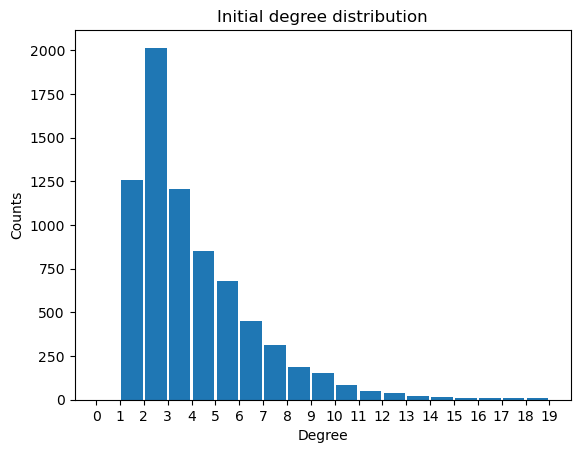

In [5]:
# Degree Analysis

print('The average degree in the network is: ',(num_edges*2)/num_nodes)
degs = [len(node_adj[1]) for node_adj in G.adjacency()]
plt.hist(degs, align="mid", rwidth=0.9, bins=range(20))
plt.title('Initial degree distribution')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.xticks(range(20))
plt.show()


In our network, the degree is determined by family and descendance, so it depends mainly on the amount of sons, daughters, and siblings a person has. Because of this, we don't get many extreme values.

We see that the average degree is 3.75, which makes sense as a lot of people in the graph still hasn't had any kids.

## Network Visualization

In [6]:
import random
def get_all_countries_colors(G):
  country_colors = {}
  for node, values in G.nodes.items():
    if 'country' not in values:
      continue

    country = values['country']
    if country not in country_colors:
      color = str(hex(random.randrange(0, 2**24)))[2:]
      while len(color) < 6:
        color = color + "0"
      country_colors[country]  = '#' + color

  return country_colors

def get_all_houses_colors(G):
  house_colors = {}
  for node, values in G.nodes.items():
    if 'house' not in values:
      continue

    country = values['house']
    if country not in house_colors:
      color = str(hex(random.randrange(0, 2**24)))[2:]
      while len(color) < 6:
        color = color + "0"
      house_colors[country]  = '#' + color

  return house_colors

def get_all_relationship_colors(G):
  relationships = ["blood", "marriage", "throne"]
  relationship_colors = {}
  for relationship in relationships:
    color = str(hex(random.randrange(0, 2**24)))[2:]
    while len(color) < 6:
      color = color + "0"

    relationship_colors[relationship] = '#' + color
  return relationship_colors

country_colors = get_all_countries_colors(G)
relationship_colors = get_all_relationship_colors(G)
house_colors = get_all_houses_colors(G)

print(country_colors)
print(relationship_colors)
print(house_colors)

{'Monaco': '#ad9944', 'Liechtenstein': '#a8c1a7', 'UK': '#b175c6', 'Sweden': '#a435b2', 'Spain': '#2b2062', 'Serbia': '#dd23b0', 'Russia': '#3fdd15', 'Romania': '#93e2ac', 'Norway': '#6c056f', 'Netherlands': '#9278ce', 'Montenegro': '#94a40c', 'Luxembourg': '#49ea46', 'Italy': '#ee62d1', 'Greece': '#57ca71', 'Denmark': '#a54557', 'Bulgaria': '#127920', 'Belgium': '#792ed0'}
{'blood': '#9742e4', 'marriage': '#17e16f', 'throne': '#b83577'}
{'House of Grimaldi': '#fa7eae', 'House of Liechtenstein': '#95a0ed', 'House of Windsor': '#89cd5c', None: '#24c958', 'House of Saxe-Coburg and Gotha': '#c29014', 'House of Hanover': '#a2c53f', 'House of Stuart': '#8dcca5', 'House of Orange-Nassau': '#2c278b', 'House of Tudor': '#771acd', 'Grey family': '#cf4dce', 'House of York': '#1b2970', 'House of Lancaster': '#9199a2', 'House of Bernadotte': '#61b56d', 'House of Holstein-Gottorp (Swedish line)': '#39840d', 'House of Palatinate-Zweibrücken': '#b6e098', 'House of Vasa': '#1e9ad6', 'Jagiellonian dyna

In [7]:
def filter_graph(G, countries, houses, based_on_houses, based_on_countries, only_monarchs):

  if based_on_countries:
    nodes = (
      node
      for node, data
      in G.nodes(data=True)
      if data.get("country") in countries
      )
  elif based_on_houses:
    nodes = (
      node
      for node, data
      in G.nodes(data=True)
      if data.get("house") in houses
      )
  subgraph = G.subgraph(nodes)
  return subgraph


In [8]:
graph_countries = ["Spain", "UK"]
graph_houses = ["House of Bourbon", "House of Bourbon-Parma", "Spanish royal family"]
based_on_countries = False
based_on_houses = True
only_monarchs = False
with_labels = True

filtered_graph = filter_graph(G, graph_countries, graph_houses, based_on_houses, based_on_countries, only_monarchs)

In [9]:
def draw_network(G, based_on_countries, based_on_houses, label_size):

  country_colors = get_all_countries_colors(G)
  countries = country_colors.keys()
  relationship_colors = get_all_relationship_colors(G)
  house_colors = get_all_houses_colors(G)
  houses = house_colors.keys()

  relationships = nx.get_edge_attributes(G, "relationship", default = "blood")

  if based_on_countries:
    node_colors = [country_colors[person['country']] if 'country'in person.keys() else '#000000' for person in G.nodes().values() ]
    patches = [mpatches.Patch(color=color, label=country) for country, color in country_colors.items()] + [mpatches.Patch(color=color, label=relationship) for relationship, color in relationship_colors.items()]

  elif based_on_houses:
    node_colors = [house_colors[person['house']] if 'house'in person.keys() else '#000000' for person in G.nodes().values() ]
    patches = [mpatches.Patch(color=house_colors[house], label=house) for house in houses] + [mpatches.Patch(color=color, label=relationship) for relationship, color in relationship_colors.items()]

  edge_colors = [relationship_colors[relationships[edge]] for edge in G.edges() ]
  # Temporary oversiplification for easy viewing. Size can be scaled on degree, importance(kings vs plebs), reign length?, ...
  node_sizes = [150 if 'country' in person.keys() else 75 for person in G.nodes().values() ]

  plt.figure(figsize=(10,10))
  pos = nx.spring_layout(G)
  nx.draw(G, node_color=node_colors, edge_color = edge_colors, node_size=node_sizes, width = 3, pos = pos)
  nx.draw_networkx_labels(G, pos=pos, font_size=label_size)
  plt.legend(handles=patches)
  plt.show()

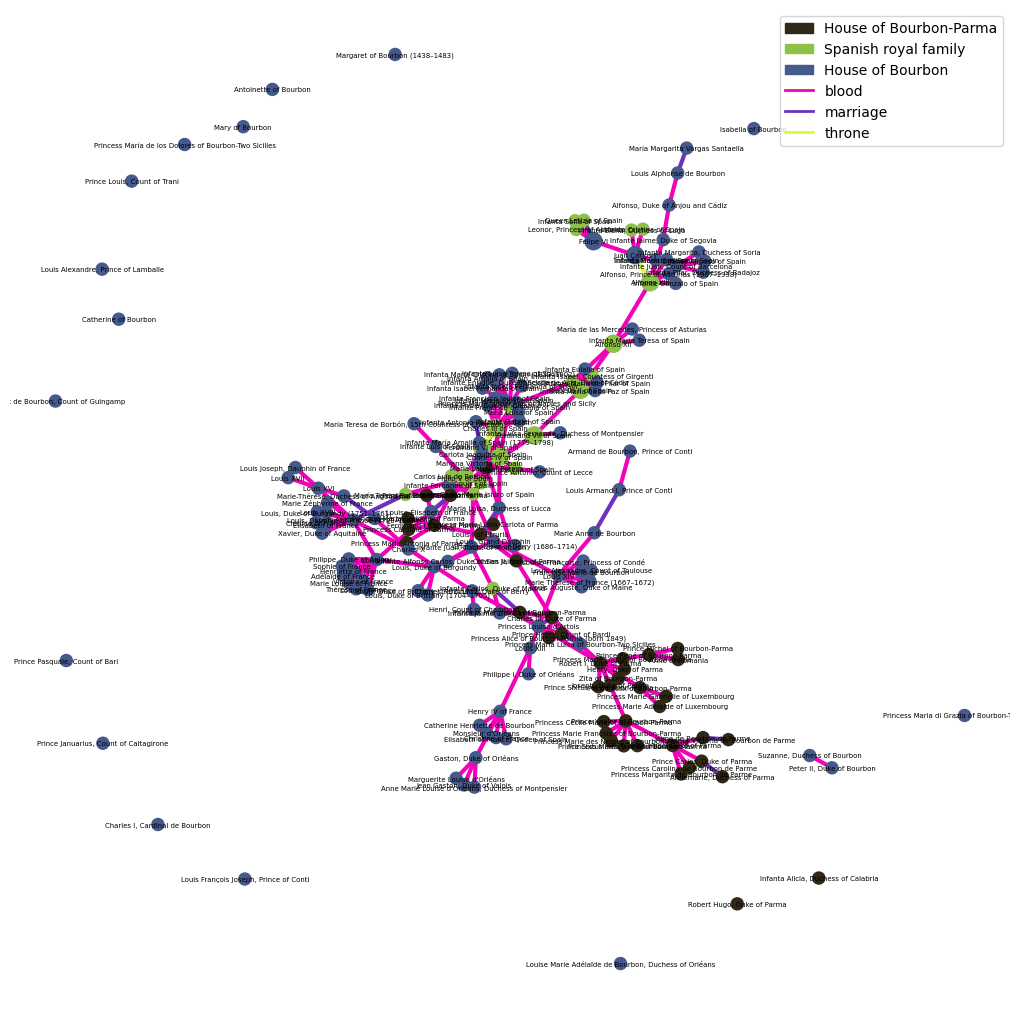

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

def draw_network(G, based_on_countries, based_on_houses, label_size):

    country_colors = get_all_countries_colors(G)
    countries = country_colors.keys()
    relationship_colors = get_all_relationship_colors(G)
    house_colors = get_all_houses_colors(G)
    houses = house_colors.keys()

    relationships = nx.get_edge_attributes(G, "relationship", default="blood")

    if based_on_countries:
        node_colors = [country_colors[person['country']] if 'country' in person.keys() else '#000000' for person in G.nodes().values()]
        node_patches = [mpatches.Patch(color=color, label=f'{country}') for country, color in country_colors.items()]
        edge_patches = [Line2D([0], [0], color=color, lw=2, label=f'{relationship}') for relationship, color in relationship_colors.items()]

    elif based_on_houses:
        node_colors = [house_colors[person['house']] if 'house' in person.keys() else '#000000' for person in G.nodes().values()]
        node_patches = [mpatches.Patch(color=house_colors[house], label=f'{house}') for house in houses]
        edge_patches = [Line2D([0], [0], color=color, lw=2, label=f'{relationship}') for relationship, color in relationship_colors.items()]

    edge_colors = [relationship_colors[relationships[edge]] for edge in G.edges()]
    # Temporary oversiplification for easy viewing. Size can be scaled on degree, importance(kings vs plebs), reign length?, ...
    node_sizes = [150 if 'country' in person.keys() else 75 for person in G.nodes().values()]

    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)
    nx.draw(G, node_color=node_colors, edge_color=edge_colors, node_size=node_sizes, width=3, pos=pos)
    nx.draw_networkx_labels(G, pos=pos, font_size=label_size)
    
    # Add colored points near the nodes and colored lines near the edges in the legend
    plt.legend(handles=node_patches + edge_patches)

    plt.show()

# Example usage:
# draw_network(G, based_on_countries=True, based_on_houses=False, label_size=12)

# Example usage:
draw_network(filtered_graph, False, True, 5)


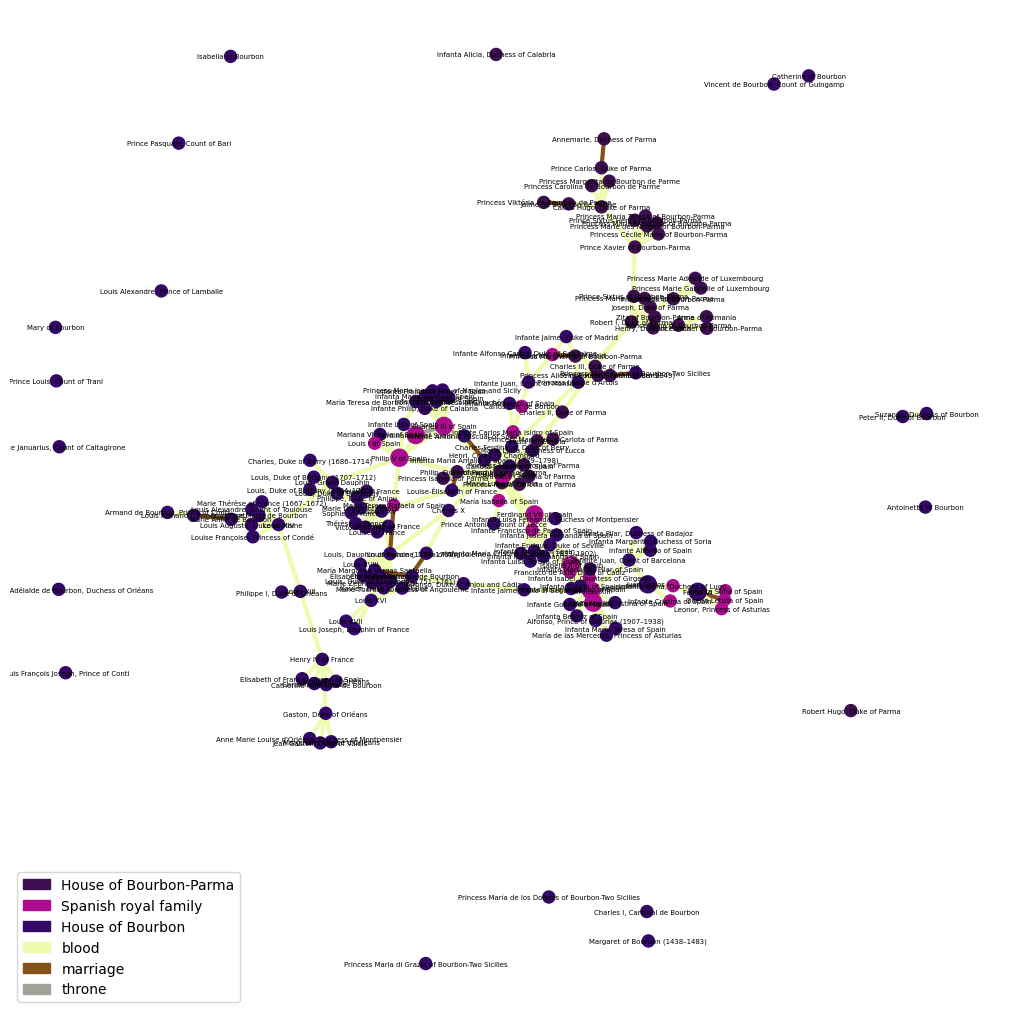

In [10]:
draw_network(filtered_graph, False, True, 5)

## Paths and Distances Study

In our initial presentation of our topic, we mentioned that we find the topic of monarchies very interesting because the different monarchies across europe are related to each other and different kings from different countries are often family. In this section we are going to explore this by performing a pathology study and seeing if we can draw paths between different monarchs.

We start by trying to calculate the shortest path between two given nodes to see the family relationship between any two given monarchs. We invite you to play and try different monarchs!

In [ ]:
# Change these parameters!
origin_monarch = "Felipe VI"
destination_monarch = "Margrethe II"

shortest_path = nx.shortest_path(G, source=origin_monarch, target=destination_monarch)

shortest_path_subgraph = G.subgraph(shortest_path)
print(shortest_path)

In [ ]:
# Now try and draw the network so you can visualize the different houses and types of relationships between the nodes.

draw_network(shortest_path_subgraph, False, True, label_size = 10)

After having played a little bit with the paths between two specific monarchs, let's now compute the average path length for all nodes, which is useful to see how well connected the network is and if we can draw a short path between any pair of given monarchs or not.

In [ ]:
# To calculate the average shortest path, we can only use connected graphs. We know that in europe there are families that are not connected to other ones, so we first have to get the biggest connected component.
connected_components = nx.connected_components(G)
print("The sizes of the connected components of the graph are: " + str([len(c) for c in sorted(connected_components, key=len, reverse=True)]))

# If we take a look at the components, we will get two of them. The biggest one is way bigger than the second one, this is why we will ignore the second subcomponent for now and focus on the biggest one.
GCC = [G.subgraph(c).copy() for c in nx.connected_components(G)][0]
avg_shortest_path = nx.average_shortest_path_length(GCC)
print("The average shortest path for the biggest connected component is: " + str(avg_shortest_path))

This average shortest path makes a lot of sense, because even though most monarchs are connected between each other, normally you will have to go minimum 3 generations back to find the common family member.


Another parameter that can tell us more about the structure of our graph is the cluster coefficient, which captures the degree to which the neighbors of a given node link to each other. We expect this to be low as we are modeling family relationships and even though they are very connected, the neighbors of a certain node don't tend to be connected very much between them because for example a granfather won't be connected (directly) to their grandson.

In [ ]:
clustering_coefficient = nx.average_clustering(GCC)
print("The average clustering coefficient is: " + str(clustering_coefficient))

As expected, it is not very high. But despite that, it is still higher than expected.

## Within the context of Monarchy

For centuries members of europen royal families often married closed relatives. This practice helped to consolidate power, titles and thrones. But as science has advanced, we now know that this can lead to problems regarding DNA and birth defects.

For our project, we wanted to use our network to perform an analysis on inbreeding in the context of royal families across Europe. To do this, we will be computing the coefficient of inbreeding (https://en.wikipedia.org/wiki/Coefficient_of_inbreeding) for each royal, to see if we come up with interesting results.

To compute the coefficient of inbreeding, we first need to compute the ascendance trees for each royal, which will help us to determine if two royals have ancestors in common.

After this, we will apply the formula which uses the distances between the target royal and the common ancestors of its parents and the inbreeding score of those common ancestors.

You can see the computation of ascendance trees and inbreeding scores in the network construction section under the attribute creation subsection.

[1% inbreeding in people](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0196360)

[('Wilhelmina Maria Frederica of Rochlitz', 0.4582366943359375), ('Charles II of Spain', 0.4424285888671875), ('Philip Prospero, Prince of Asturias', 0.4424285888671875), ('Prince Augustus of Prussia', 0.3739280700683594), ('Prince Louis Ferdinand of Prussia (1772–1806)', 0.3739280700683594), ('Princess Louise of Prussia (1770–1836)', 0.3739280700683594), ('Princess Maria Antonietta of Bourbon-Two Sicilies', 0.3705136366188526), ('Princess Maria Carolina of Bourbon-Two Sicilies (1856–1941)', 0.3705136366188526), ('Prince Umberto, Count of Salemi', 0.3611835923511535), ('Isabella II of Spain', 0.359496533870697), ('Infante Fernando of Spain', 0.359496533870697), ('Infante Juan, Count of Montizón', 0.359496533870697), ('Infanta Luisa Fernanda, Duchess of Montpensier', 0.359496533870697), ('Francisco de Asís, Duke of Cádiz', 0.359496533870697), ('Infanta Amalia of Spain', 0.359496533870697), ('Infanta María Cristina of Spain (1833–1902)', 0.359496533870697), ('Infanta Josefa Fernanda of S

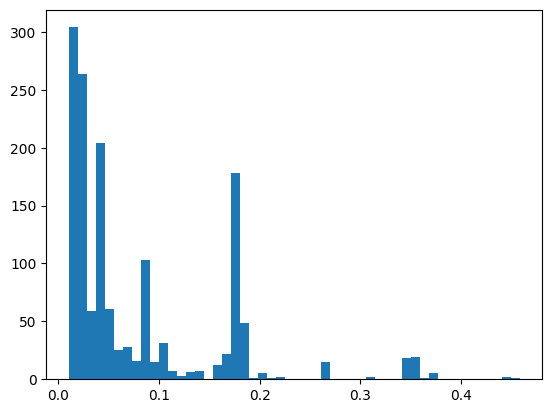

In [ ]:
import numpy as np
inbreeding = [(name, attr['inbreed_score']) for name, attr in G.nodes().items()]
inbreeding = sorted(inbreeding, key=lambda item: item[1], reverse=True)
inbreeding_nums = [val for _, val in inbreeding if val > 0.01]
print(inbreeding)
#print(f'max in: {max(inbreeding)}, min in: {min(inbreeding)}, avg in: {np.mean(inbreeding)}')
print(G.nodes['Charles II of Spain']['inbreed_score'])
plt.hist(inbreeding_nums, bins=50)
plt.show()

# COMMUNITY ANALYSIS

In [ ]:
def modularity(node_list):
    L = G.number_of_edges()
    community_graph = G.subgraph(node_list)
    Lc = community_graph.number_of_edges()
    kc = sum([G.degree(pers) for pers in node_list if pers in G])

    return (Lc / L) - (kc / (2*L))**2

In [ ]:
houses = defaultdict(list)
for name, attr in G.nodes().items():
    houses[attr['house']].append(name)

for house, people in sorted(houses.items(), key=lambda item: len(item[1]), reverse=True):
    if len(people)>1:
        inbreeding_scores = [G.nodes[person]['inbreed_score'] for person in people]
        print(f'id: {house}, size: {len(people)}, modularity: {modularity(people):.4}, avg inbreeding: {np.mean(inbreeding_scores):.05}')

id: None, size: 3524, modularity: 0.1134, avg inbreeding: 0.0030914
id: Ottoman dynasty, size: 232, modularity: 0.02298, avg inbreeding: 0.00032833
id: House of Hohenzollern, size: 148, modularity: 0.009395, avg inbreeding: 0.046617
id: House of Wettin, size: 147, modularity: 0.01082, avg inbreeding: 0.02291
id: House of Romanov, size: 136, modularity: 0.01211, avg inbreeding: 0.027338
id: House of Wittelsbach, size: 131, modularity: 0.008102, avg inbreeding: 0.034365
id: House of Bourbon, size: 113, modularity: 0.004407, avg inbreeding: 0.059478
id: House of Habsburg, size: 113, modularity: 0.009205, avg inbreeding: 0.12197
id: House of Habsburg-Lorraine, size: 108, modularity: 0.006219, avg inbreeding: 0.063674
id: House of Glücksburg, size: 102, modularity: 0.008449, avg inbreeding: 0.028843
id: House of Savoy, size: 89, modularity: 0.005811, avg inbreeding: 0.035927
id: House of Braganza, size: 84, modularity: 0.00631, avg inbreeding: 0.052682
id: House of Ascania, size: 76, modula

More analysis can be done on the auto-community generator and houses, but we can see that one of the top communities is consistently made up of mostly bourbon royal families.

In [ ]:
from community import community_louvain
from collections import defaultdict

coms = community_louvain.best_partition(G)
communities = defaultdict(list)
community_houses = defaultdict(lambda: defaultdict(int))
for pers, com in coms.items():
    communities[com].append(pers)
    community_houses[com][G.nodes[pers]['house']]+=1

num_houses = 4
for community, people in sorted(communities.items(), key=lambda item: modularity(item[1]), reverse=True):
    houses = sorted(community_houses[community].items(), key=lambda item: item[1], reverse=True)
    print(f'id: {community}, size: {len(people)}, modularity: {modularity(people):.4}, houses:{houses[:num_houses]} + {len(houses)-num_houses} more')

id: 16, size: 163, modularity: 0.05865, houses:[('House of Hohenzollern', 24), (None, 22), ('Saxe-Weimar-Eisenach', 18), ('House of Romanov', 17)] + 23 more
id: 11, size: 104, modularity: 0.03914, houses:[('House of Bourbon-Two Sicilies', 22), ('House of Bourbon', 19), (None, 19), ('Spanish royal family', 10)] + 11 more
id: 6, size: 120, modularity: 0.03688, houses:[(None, 65), ('House of Hanover', 20), ('Brunswick-Bevern', 9), ('House of Saxe-Coburg and Gotha', 4)] + 11 more
id: 26, size: 105, modularity: 0.03591, houses:[(None, 21), ('House of Orléans', 19), ('House of Braganza', 17), ('House of Saxe-Coburg and Gotha-Koháry', 10)] + 12 more
id: 32, size: 112, modularity: 0.03588, houses:[(None, 22), ('House of Hohenzollern', 15), ('House of Saxe-Coburg and Gotha', 10), ('House of Glücksburg', 10)] + 17 more
id: 15, size: 104, modularity: 0.03343, houses:[('House of Romanov', 48), (None, 36), ('House of Glücksburg', 5), ('House of Saxe-Coburg and Gotha', 3)] + 10 more
id: 10, size: 95

# TEXT ANALYSIS

In [3]:
#Folder  where are saved the txt files with the text of the monarchs
preprocess_dir = r"C:\Users\david\Desktop\CORSI ORAAA\SOCIAL-GRAPH\Final_project\monarch_text"
corpus_root = preprocess_dir

In [4]:
stop_words = set(stopwords.words('english'))
#print(len(stop_words))

list_remove =["ref","url", "p", "http","https","www", "org", "com", "publisher", "file", "page", "html", "jpg", "br", "sfn"]
stop_words.update(list_remove)
#print(len(stop_words))



# Function to calculate vocabulary size
def vocab_size(text):
    """ text: nltk.Text object"""

    words = text.tokens
    unique_words = set(words)
    return len(unique_words)



def remove_punctuation(tokens):
    # Define a string containing all punctuation characters
    punctuation_chars = string.punctuation +"'' ``"

    # Remove all punctuation characters from the list of tokens
    tokens_without_punctuation = [token  for token in tokens if token not in punctuation_chars]
    return tokens_without_punctuation

# set lower case
def set_lower_case(tokens):
    tokens_lowercase = [token.lower() for token in tokens]
    return tokens_lowercase

########################### remove punctuation and set lower case ##############################

def remove_punctuation_lower(tokens):
    # Define a string containing all punctuation characters
    punctuation_chars = string.punctuation +"'' ``"

    # Remove all punctuation characters from the list of tokens
    tokens_without_punctuation = [token.lower()  for token in tokens if token not in punctuation_chars]
    return tokens_without_punctuation


def occurencies(list):
    occurencies = {}
    for i in list:
        occurencies[i] = occurencies.get(i, 0) + 1
    return occurencies

In [5]:
# corpus creation
corpus = PlaintextCorpusReader(corpus_root, ".*")
all_files_list = corpus.fileids() # list of alle the files in the corpus ("monarch corpus")
corpus_raw = corpus.raw() # raw text of the entire corpus ("monarch corpus")

# TOKENIZATION of the corpus

# takes to long to run (more then 30 minutes and still running!!)
#tokens = nltk.word_tokenize(corpus_raw) # tokenized corpus = list of tokens
wordlist = corpus.words()  # list of all the words/tokens in the corpus (
print( "wordlist lenght:", len(wordlist) ,( "= number of tokens in the corpus"))

tokens_clean_lower = remove_punctuation_lower(wordlist)  # remove punctuation and set lower case
# create a text object from the corpus
text_obj = nltk.Text(tokens_clean_lower)

# vocabulary size (number of unique tokens in the corpus)
tokens_vocabulary_len = vocab_size(text_obj)
print("Vocabulary size:", tokens_vocabulary_len ,"(= number of unique tokens in the corpus)")

##### stop words- removal
tokens_clean_lower_NoStopWords = [word for word in tokens_clean_lower if word.isalpha() and word not in stop_words]
text_obj_NoStopWords = nltk.Text(tokens_clean_lower_NoStopWords)

wordlist lenght: 24022415 = number of tokens in the corpus
Vocabulary size: 275332 (= number of unique tokens in the corpus)


The lexical diveristy is defined as follow:

$lexical\_diversity = distinct\_tokens / N\_tokens $ .

In [8]:
# lexical diversity among all the wikipedia pages
def lexical_diversity(text):
 return len(set(text)) / len(text)  #different vocabulary used/all words used

# calculate the percentage
def percentage(count, total):
    return 100 * count / total #percentage

div= lexical_diversity(text_obj)
print("Lexical diversity:", div,  f"\n It means that only {round(div*100,3)} % of the words are unique, the other {100- round(div*100,3)} % of the text is composed of the repetition of this words. ")

Lexical diversity: 0.014602766067221985 
 It means that only 1.46 % of the words are unique, the other 98.54 % of the text is composed of the repetition of this words. 


 nltk.Text Usage: After tokenizing a text, you can create an nltk.Text object from the tokenized words. This object allows you to perform operations like concordance searches, frequency analysis, and context exploration

## Most common words plot

In [31]:
def frequency_words(tokens_clean_lower,n=75):
    # Tokenize the text (get all tokens from the text)
    words = tokens_clean_lower

    # Get the English stopwords
    stop_words = set(stopwords.words('english'))

    # Remove stopwords and non-alphabetic words  (isalpha() returns True if all characters in the string are alphabetic
    # then check if the word is not in the stop_words list) if both condition are True acccept the word
    #filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    filtered_words = [word.lower() for word in words if word.isalpha() ]

    # Create a frequency distribution of the filtered words
    fdist = nltk.FreqDist(filtered_words)

    # Get the 75 most frequent words (from FreqDist object!)
    most_common_words = fdist.most_common(n)

    return most_common_words

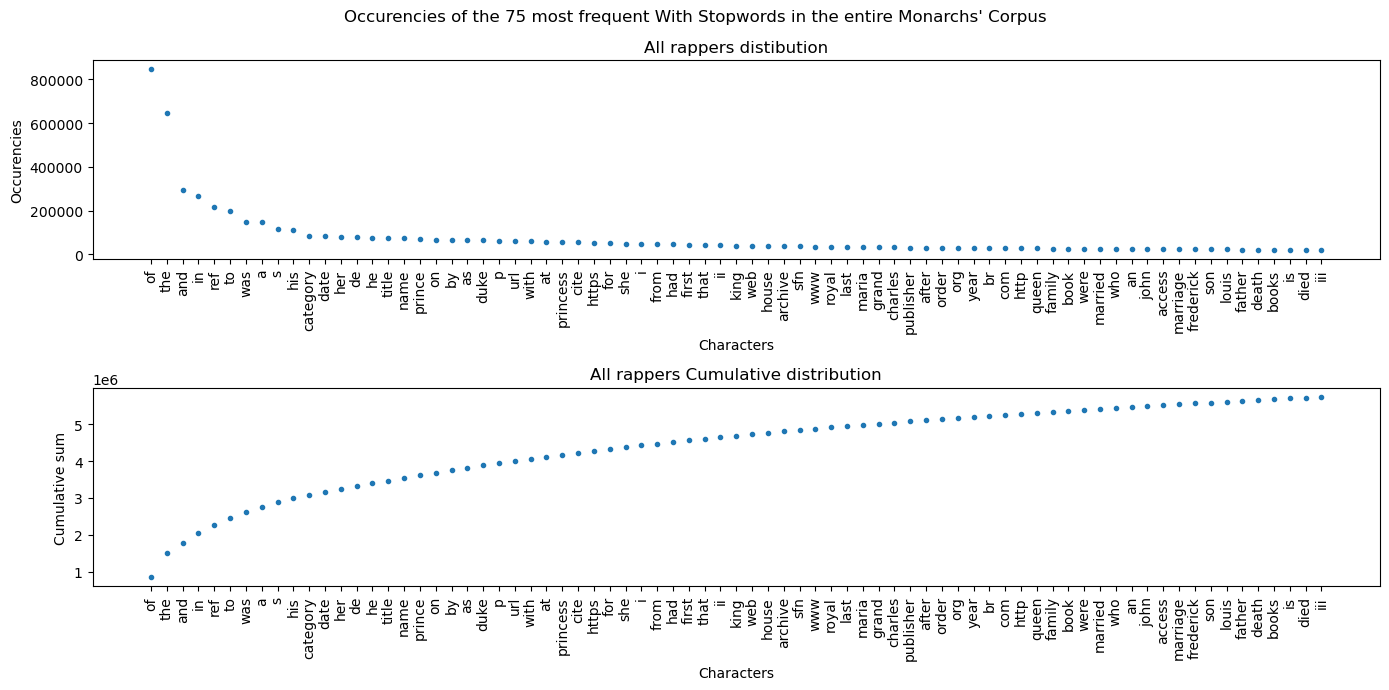

In [36]:
# plot the histogram of the 75 most common words

most_frequent_words = frequency_words(tokens_clean_lower)
k ,freq = zip(*most_frequent_words[:]) # remove the word  "ref"

fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Occurencies of the 75 most frequent With Stopwords in the entire Monarchs\' Corpus')
# text scale
fig.set_size_inches(14, 7)


ax1.plot(k, freq, ".")
ax1.set_title('All rappers distibution')
ax1.set_ylabel('Occurencies')
ax1.set_xlabel('Characters')
ax1.set_xticks(range(len(k)))
ax1.set_xticklabels(k, rotation=90)



# ax2 cumulative distibution
ax2.plot(k, np.cumsum(list(freq)), ".")
ax2.set_title('All rappers Cumulative distribution')
ax2.set_ylabel('Cumulative sum')
ax2.set_xlabel('Characters')
ax2.set_xticks(range(len(k)))
ax2.set_xticklabels(k, rotation=90)

plt.tight_layout()

plt.show()

We have to define stopwords, and maybe remove from the text also words like "ref" and url ... that are not stopwords but are not relevant for the analysis of the text m

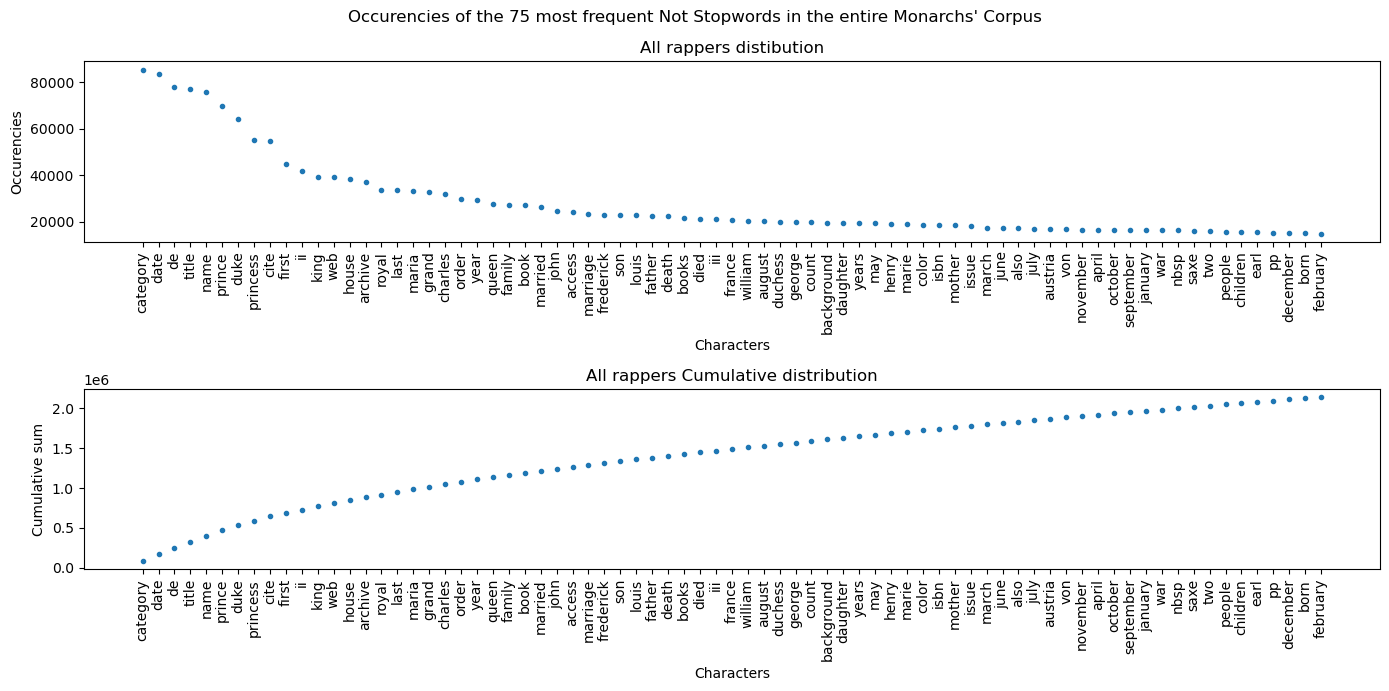

In [37]:
def frequency_non_stopwords__1(tokens_clean_lower,n=75):
    # Tokenize the text (get all tokens from the text)
    words = tokens_clean_lower

    # Get the English stopwords
    stop_words = stopwords.words('english')

    list_remove =["ref","url", "p", "http", "https","www", "org", "com", "publisher", "file", "page", "html", "jpg", "br", "sfn"]
    stop_words+= list_remove

    # Remove stopwords and non-alphabetic words  (isalpha() returns True if all characters in the string are alphabetic
    # then check if the word is not in the stop_words list) if both condition are True acccept the word
    filtered_words_1 = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    #filtered_words_1 = [word.lower() for word in filtered_words_1 if word.lower() not in stop_words]

    # Create a frequency distribution of the filtered words
    fdist = nltk.FreqDist(filtered_words_1)

    # Get the 75 most frequent words (from FreqDist object!)
    most_common_words_1 = fdist.most_common(n)

    return most_common_words_1

most_frequent_words__1 = frequency_non_stopwords__1(tokens_clean_lower)

# plot the histogram of the 75 most common words
k_1 ,freq_1 = zip(*most_frequent_words__1[:]) # remove the word  "ref"

fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Occurencies of the 75 most frequent Not Stopwords in the entire Monarchs\' Corpus')
# text scale
fig.set_size_inches(14, 7)


ax1.plot(k_1, freq_1, ".")
ax1.set_title('All rappers distibution')
ax1.set_ylabel('Occurencies')
ax1.set_xlabel('Characters')
ax1.set_xticks(range(len(k_1)))
ax1.set_xticklabels(k_1, rotation=90)



# ax2 cumulative distibution
ax2.plot(k_1, np.cumsum(list(freq_1)), ".")
ax2.set_title('All rappers Cumulative distribution')
ax2.set_ylabel('Cumulative sum')
ax2.set_xlabel('Characters')
ax2.set_xticks(range(len(k_1)))
ax2.set_xticklabels(k_1, rotation=90)

plt.tight_layout()

plt.show()

### Word distribution of all the corpus (DO WE WANT IT? MAYBE IS NOT THAT EXPLICATIVE IN OUR CASE)

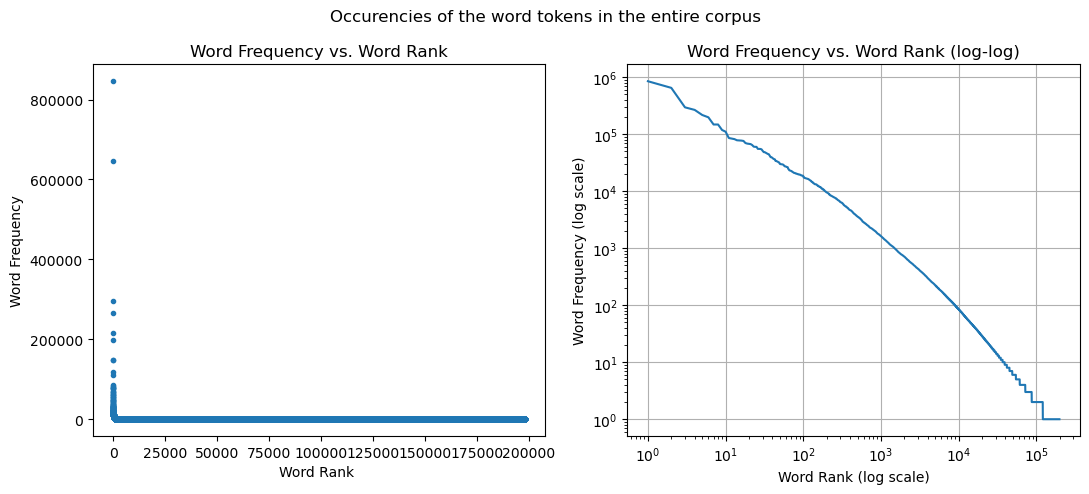

In [38]:
def plot_most_frequent_word(tokens_clean_lower):
    # Tokenize the text (get all tokens from the text)
    words = tokens_clean_lower

    # Get the English stopwords
    #stop_words = set(stopwords.words('english')) # include all words

    # Remove stopwords and non-alphabetic words  (isalpha() returns True if all characters in the string are alphabetic
    # then check if the word is not in the stop_words list) if both condition are True acccept the word
    #filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    filtered_words = [word.lower() for word in words if word.isalpha() ]
    # Create a frequency distribution of the filtered words
    fdist = nltk.FreqDist(filtered_words)

     # Sort the words by frequency in descending order
    sorted_words = sorted(fdist, key=lambda word: fdist[word], reverse=True)

    # Create an array of word frequencies
    word_freq = [fdist[word] for word in sorted_words]

    # Create an array of word ranks
    word_rank = np.arange(1, len(sorted_words) + 1)
    # subplot
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(11, 5)
    # text scale
    fig.suptitle('Occurencies of the word tokens in the entire corpus')
    # ax1
    ax1.plot(word_rank, word_freq, ".")
    ax1.set_title("Word Frequency vs. Word Rank")
    ax1.set_ylabel("Word Frequency")
    ax1.set_xlabel("Word Rank ")


    #log log plot

    ax2.loglog(word_rank, word_freq)
    ax2.set_title("Word Frequency vs. Word Rank (log-log)")
    ax2.set_xlabel("Word Rank (log scale)")
    ax2.set_ylabel("Word Frequency (log scale)")
    plt.grid(True)
    plt.tight_layout()

    plt.show()

plot_most_frequent_word(tokens_clean_lower)

## Word Clouds

### wordcloud all corpus

In [15]:

freq_dict_1 = nltk.FreqDist(tokens_clean_lower_NoStopWords)


def TF(freq_dict_1, c=0 , normalization=True):
    # regolarization factor for balancing the different world count
    #tokens count east, tokens count west    
    count_1 = 1#max(freq_dict_1.values())
    
    TF= []

    if normalization:
        for i in freq_dict_1.keys():
                TF.append( (i,  round(freq_dict_1[i]/count_1,3)  ) )

    TF_sorted = sorted(TF, key=lambda tup: tup[1], reverse=True)
    return TF_sorted

In [10]:
print(tokens_clean_lower_NoStopWords[:10])

['infobox', 'official', 'post', 'post', 'guvernadur', 'body', 'montenegro', 'insignia', 'guvernaduri', 'radonjici']


In [18]:
TF_sorted = TF(freq_dict_1, c=0, normalization=True)
print(TF_sorted )
#print(tokens_clean_lower_NoStopWords[:10])

[('category', 85456.0), ('date', 83343.0), ('de', 77948.0), ('title', 76916.0), ('name', 75833.0), ('prince', 69750.0), ('duke', 64238.0), ('princess', 55010.0), ('cite', 54890.0), ('first', 44816.0), ('ii', 41882.0), ('king', 39425.0), ('web', 39248.0), ('house', 38335.0), ('archive', 37118.0), ('royal', 33821.0), ('last', 33795.0), ('maria', 33153.0), ('grand', 32738.0), ('charles', 32087.0), ('order', 29738.0), ('year', 29555.0), ('queen', 27655.0), ('family', 27175.0), ('book', 27161.0), ('married', 26580.0), ('john', 24627.0), ('access', 24103.0), ('marriage', 23240.0), ('frederick', 23090.0), ('son', 22872.0), ('louis', 22852.0), ('father', 22558.0), ('death', 22356.0), ('books', 21878.0), ('died', 21388.0), ('iii', 21220.0), ('france', 20803.0), ('william', 20589.0), ('august', 20229.0), ('duchess', 20170.0), ('george', 20015.0), ('count', 19945.0), ('background', 19655.0), ('daughter', 19601.0), ('years', 19560.0), ('may', 19537.0), ('henry', 19301.0), ('marie', 19294.0), ('col

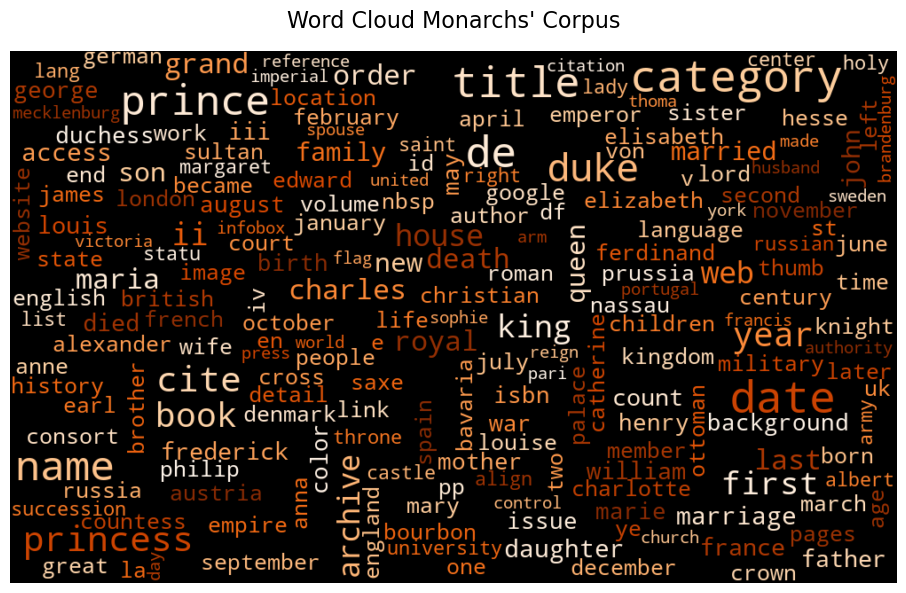

In [17]:
# Creating a single string containing all the words for each corpus

word_cloud_list = [ "".join( (str(word[0])+" " )*int(word[1])) for word in TF_sorted]
west_cloud_string = "".join(word_cloud_list)

# Create and generate a word cloud image:
fig = plt.figure()
fig.set_size_inches(15, 6)  # size of the figure (the outside box)
fig.suptitle("Word Cloud Monarchs' Corpus", fontsize=16)

wordcloud_1 = WordCloud(width=1000, height=600,max_font_size=50,  collocations = False, colormap='Oranges_r').generate(west_cloud_string)


plt.imshow(wordcloud_1, interpolation="bilinear" ,)
#plt.title("Word Cloud Monarchs' Corpus", fontsize=14)
plt.axis("off")


plt.tight_layout(  )


plt.show()

### Word cloud comparison
Here,a wordcloud combarison between all nodes wiht an imbreeding score below the T_1  and above T_2 threshold is performed.
With the T_1 threshold () all nodes that.......

count nodes with imbreeding score > 40: 63


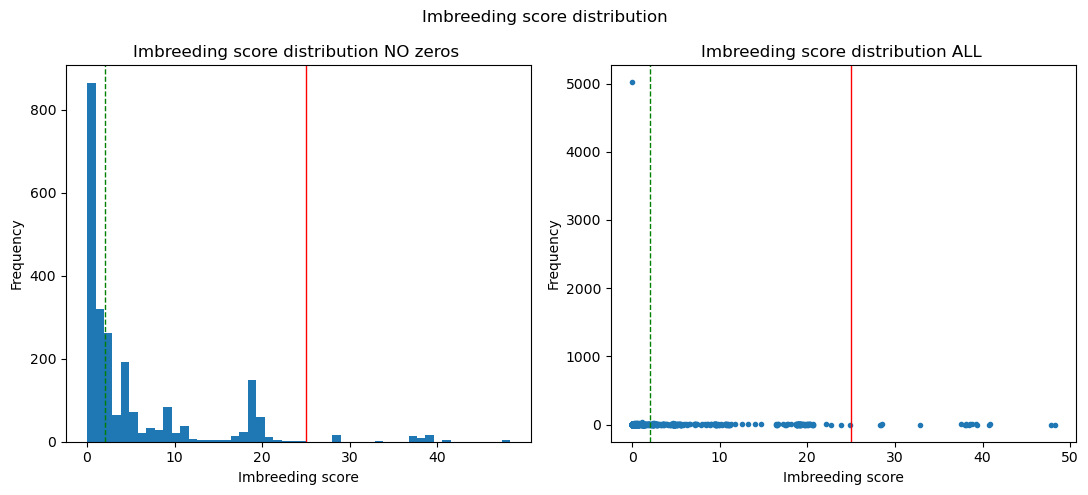

In [25]:
# make a list of all the inbreeding scores and multiply by 100 to have a percentage
node_names = list(G.nodes())
inbreed_scores = [G.nodes[node]['inbreed_score']*100 for node in node_names]
inbreed_scores_NOzeros = [i for i in inbreed_scores if i != 0  ]

# set the threshold value for which the imbreading score is considered high
#probability of having a child with a genetic disorder > ...% and
# lower threshold for which the imbreading score is considered low = not affecting the health of the child in any way

#  WE HAVE TO CHOSE THE THRESHOLD VALUE!!!! not the one below that are just for testing
threshold_up = 25 #np.mean(imbreed_scores_NOzeros) + 2*np.std(imbreed_scores_NOzeros)
threshold_down = 2

# plot subplot
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(11, 5)
# text scale
fig.suptitle('Imbreeding score distribution')
# ax1
ax1.hist(inbreed_scores_NOzeros, bins=50)
ax1.set_title("Imbreeding score distribution NO zeros ")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Imbreeding score")
ax1.axvline(threshold_up, color='red', linestyle='-', linewidth=1)
ax1.axvline(threshold_down, color='green', linestyle='--', linewidth=1)
# x ticks
ax1.set_xticks(range(0, int(max(inbreed_scores_NOzeros)) , 10))

# ax2 values and frequency
k_conf = occurencies(inbreed_scores).keys()
freq_conf = occurencies(inbreed_scores).values()

# ax2
ax2.plot(k_conf, freq_conf, ".")
ax2.set_title("Imbreeding score distribution ALL ")
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Imbreeding score")
ax2.axvline(threshold_up, color='red', linestyle='-', linewidth=1)
ax2.axvline(threshold_down, color='green', linestyle='--', linewidth=1)
#ax2.set_xticks(range(0, int(max(imbreed_scores)) ))
plt.tight_layout()

print("count nodes with imbreeding score > 40:", len([i for i in inbreed_scores if i > threshold_up ]))

 Create to corpus with the text of the wikipedia pages of the monarchs with high and low imbreeding score

In [29]:
# extract all the nodes names and put in a list
node_names = list(G.nodes())
#concert inbreeding score to a % value
#imbreed_scores = [G.nodes[node]['inbreed_score_NEW']*100 for node in node_names]

#create diuctionary with all nodes names and scores
my_dict_imbr = dict(zip(node_names, inbreed_scores))
# Sort the dictionary by values in descending order
sorted_dict_imbr = dict(sorted(my_dict_imbr.items(), key=lambda item: item[1], reverse=True))

# Visualize the 10 persons with higher inbreeding score :
first_10_items = dict(list(sorted_dict_imbr.items())[:30])
print("The 10 perosns with higher inbreeding score are : ",first_10_items)

print("\n \n The imbreading score which have a value different from  are :", len([i for i in inbreed_scores if i != 0]) , "froma a total number of node equal to : " ,len(node_names))


The 10 perosns with higher inbreeding score are :  {'Charles II of Spain': 48.284912109375, 'Philip Prospero, Prince of Asturias': 48.284912109375, 'Wilhelmina Maria Frederica of Rochlitz': 47.832489013671875, 'Prince Augustus of Prussia': 40.882110595703125, 'Prince Louis Ferdinand of Prussia (1772–1806)': 40.882110595703125, 'Princess Louise of Prussia (1770–1836)': 40.882110595703125, 'Princess Maria Antonietta of Bourbon-Two Sicilies': 40.691132098436356, 'Princess Maria Carolina of Bourbon-Two Sicilies (1856–1941)': 40.691132098436356, 'Prince Umberto, Count of Salemi': 39.37545455992222, 'Isabella II of Spain': 39.28413540124893, 'Infante Fernando of Spain': 39.28413540124893, 'Infante Juan, Count of Montizón': 39.28413540124893, 'Infanta Luisa Fernanda, Duchess of Montpensier': 39.28413540124893, 'Francisco de Asís, Duke of Cádiz': 39.28413540124893, 'Infanta Amalia of Spain': 39.28413540124893, 'Infanta María Cristina of Spain (1833–1902)': 39.28413540124893, 'Infanta Josefa Fe

In [56]:
print(threshold_up)
nodes_up = [key for key, value in sorted_dict_imbr.items() if value > threshold_up ]
nodes_down = [key for key, value in sorted_dict_imbr.items() if value < threshold_down]

# create a corpus with the text of the nodes with high imbreeding score
def corpus_from_nodes(nodes_list, stop_words= stop_words, G=G):
    list_tokens= []
    for node in nodes_list:
        # extract tokens attribute from the node
        tokens = G.nodes[node]["tokens"]
        # removw not alphabetic words and stopwords
        tokens_NoStopWords = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

    #return corpus as a list of tokens
        list_tokens += tokens_NoStopWords
        corpus = nltk.Text(tokens_NoStopWords)

    return list_tokens , corpus



25


In [32]:
tokens_upper_imbr_nostop , corpus_upper = corpus_from_nodes(nodes_up , stop_words= stop_words, G=G)
tokens_lower_imbr_nostop , corpus_lower = corpus_from_nodes(nodes_down , stop_words= stop_words, G=G)
print("Len tokens upper imbr:", len(tokens_upper_imbr_nostop))
print("Len tokens lower imbr:", len(tokens_lower_imbr_nostop))


Len tokens upper imbr: 75652
Len tokens lower imbr: 5110021


In [33]:
genetic_disorders = ['Hemophilia','Cystic Fibrosis','Huntington\'s Disease','Tay-Sachs Disease','Autosomal Recessive Disorders','Mental Retardation',
    'Neurofibromatosis','Schizophrenia','Bipolar Disorder','Inherited Neuromuscular Disorders','Down Syndrome','Turner Syndrome',
    'Klinefelter Syndrome','Marfan Syndrome','Sickle Cell Anemia','Thalassemia','Spinal Muscular Atrophy','Albinism','Phenylketonuria (PKU)',
    'Fragile X Syndrome','Williams Syndrome','Gaucher Disease','Muscular Dystrophy','Cerebral Palsy','Ehlers-Danlos Syndrome','Rett Syndrome',
    'Polycystic Kidney Disease','Prader-Willi Syndrome','Cri du Chat Syndrome', "mad"]


In [50]:
freq_dict_upper = nltk.FreqDist(tokens_upper_imbr_nostop)
freq_dict_lower = nltk.FreqDist(tokens_lower_imbr_nostop)

def TF_TR(freq_dict_1, freq_dict_2, c=1, normalization=True , DIS=1):
    # regolarization factor for balancing the different world count
    #tokens count east, tokens count west
    count_1 = sum(freq_dict_1.values())
    count_2 = sum(freq_dict_2.values())

    disorder_count = 0
    TF_TR = []
    dic_dis = {}

    if normalization:
        for i in freq_dict_1.keys():
            if i in freq_dict_2.keys():
                if i in genetic_disorders:
                    TF_TR.append((i, round( ((freq_dict_1[i]/count_1 )   /(freq_dict_2[i]/count_2 ))*DIS  ,4) ))
                    disorder_count +=1
                    dic_dis[i]= freq_dict_1[i]
                else:
                    TF_TR.append((i, round( (freq_dict_1[i]/count_1 )   /(freq_dict_2[i]/count_2 )  ,4) ))

            else:
                if i in genetic_disorders:
                    TF_TR.append((i, round ( ((freq_dict_1[i]/count_1 )/c) *DIS ,4) ))
                    disorder_count +=1
                    dic_dis[i]= freq_dict_1[i]
                else:
                    TF_TR.append((i, round ( (freq_dict_1[i]/count_1 )/c ,4) ))
    else:
        for i in freq_dict_1.keys():
                if i in freq_dict_2.keys():
                    TF_TR.append((i, round(freq_dict_1[i]/freq_dict_2[i],2) ))
                else:
                    TF_TR.append((i, round (freq_dict_1[i]/c ,2) ))


    TF_TR_sorted = sorted(TF_TR, key=lambda tup: tup[1], reverse=True)
    print("disorder count:", disorder_count)
    print(dic_dis)
    return TF_TR_sorted

#calculate TF_TR for the two corpus (upper and lower imbreeding score)

TF_TR_upper = TF_TR(freq_dict_upper, freq_dict_lower, c=1, normalization=True)


TF_TR_lower = TF_TR(freq_dict_lower, freq_dict_upper, c=1, normalization=True)

# create a list and string with the words repeated according to their TF_TR score ( needed for the wordcloud)

upper_cloud_list = [ "".join( (str(word[0])+" " )*int(word[1])) for word in TF_TR_upper]
# add a word 20000 times to make it appear in the wordcloud
#upper_cloud_list.append("UPPERMY "*20000)


upper_cloud_string = "".join(upper_cloud_list)#
# add a word wit

lower_cloud_list = [ "".join( (str(word[0])+" " )*int(word[1])) for word in TF_TR_lower]
lower_cloud_string = "".join(lower_cloud_list)


disorder count: 1
{'mad': 1}
disorder count: 1
{'mad': 145}


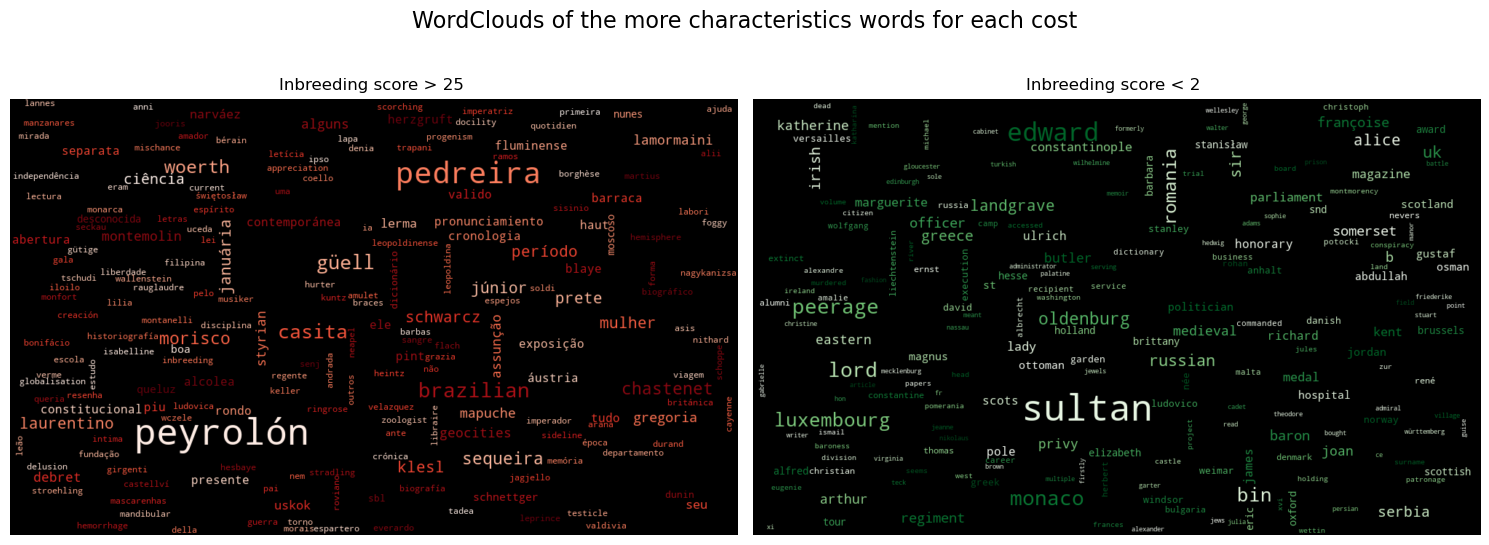

up 944660
down  41217


In [63]:
# create word cloud obj
wordcloud_upper = WordCloud(width=1000, height=600,max_font_size=50,  collocations = False, colormap= 'Reds').generate(upper_cloud_string)
wordcloud_lower = WordCloud(width=1000, height=600,max_font_size=50,  collocations = False, colormap='Greens').generate(lower_cloud_string)

#create figure
fig = plt.figure()
fig.set_size_inches(15, 6)  # size of the figure (the outside box)
fig.suptitle('WordClouds of the more characteristics words for each cost', fontsize=16)

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_upper, interpolation="bilinear" ,)
plt.title(f"Inbreeding score > {threshold_up} ")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_lower, interpolation="bilinear")
plt.title(f"Inbreeding score < {threshold_down} ")
plt.axis("off")

plt.tight_layout(  )
plt.show()

#shows the nummber of tokens considerated in each group (could be removed at the end)
print( "up",len(upper_cloud_string))
print( "down ",len(lower_cloud_string))


From the wordcloud comparison above it could be seen that no particular  words concerning inbreeding issues were found in the group for high healt risk  inbreeding score.

* check we by lower the upper threshold (taking more nodes) the wordcloud **DOWN** get reacher of words.off!!
 (with higher threshold for up the green )

* a lot of german words are in the upper

## SENTIMENT ANALYSIS

In [77]:
# list of nodes with high imbreeding score (defined before in wordcloud section)
threshold_up = 25
threshold_down = 0.1

#Divide nodes in 2 groups (section before)
#nodes_up = [key for key, value in sorted_dict_imbr.items() if value > threshold_up ]
##odes_down = [key for key, value in sorted_dict_imbr.items() if value < threshold_down]

# list od helth sentiment score
sentiment_scores_up = [G.nodes[node]['sentiment_score_2'] for node in nodes_up]
sentiment_scores_down = [G.nodes[node]['sentiment_score_2'] for node in nodes_down]  #helt score


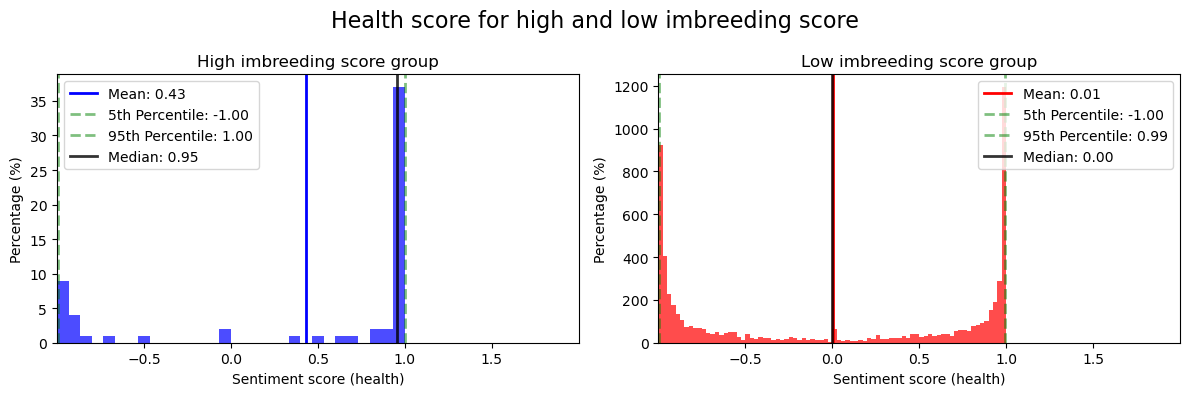

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the sentiment_scores_up and sentiment_scores_down defined

# Subplot comparing imbreed_scores_up against imbreed_scores_down distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=False)

# Figure title
fig.suptitle('Health score for high and low imbreeding score', fontsize=16)

# Create histograms for each set of scores with density=True for percentage
hist_up = ax1.hist(sentiment_scores_up, bins=30, color='blue', alpha=0.7,  density=False)
hist_down = ax2.hist(sentiment_scores_down, bins=80, color='red', alpha=0.7,  density=False)

# Set x-axis limits for better comparison
x_min, x_max = min(min(sentiment_scores_up), min(sentiment_scores_down) + 1), max(
    max(sentiment_scores_up) + 1, max(sentiment_scores_down)
)
ax1.set_xlim(x_min, x_max)
ax2.set_xlim(x_min, x_max)

# Calculate statistics for each set of scores
mean_up = np.mean(sentiment_scores_up)
percentile_5_up = np.percentile(sentiment_scores_up, 5)
percentile_95_up = np.percentile(sentiment_scores_up, 90)
median_up = np.median(sentiment_scores_up)

mean_down = np.mean(sentiment_scores_down)
percentile_5_down = np.percentile(sentiment_scores_down, 5)
percentile_95_down = np.percentile(sentiment_scores_down, 90)
median_down = np.median(sentiment_scores_down)

# Add legends, labels, and titles to the plot
ax1.axvline(mean_up, color='blue', linestyle='-', linewidth=2, label=f'Mean: {mean_up:.2f}')
ax1.axvline(percentile_5_up, color='green', linestyle='dashed', linewidth=2, label=f'5th Percentile: {percentile_5_up:.2f}', alpha=0.5)
ax1.axvline(percentile_95_up, color='green', linestyle='dashed', linewidth=2, label=f'95th Percentile: {percentile_95_up:.2f}', alpha=0.5)
ax1.axvline(median_up, color='black', linestyle='-', linewidth=2, label=f'Median: {median_up:.2f}', alpha=0.8)

ax2.axvline(mean_down, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_down:.2f}')
ax2.axvline(percentile_5_down, color='green', linestyle='dashed', linewidth=2, label=f'5th Percentile: {percentile_5_down:.2f}', alpha=0.5)
ax2.axvline(percentile_95_down, color='green', linestyle='dashed', linewidth=2, label=f'95th Percentile: {percentile_95_down:.2f}', alpha=0.5)
ax2.axvline(median_down, color='black', linestyle='-', linewidth=2, label=f'Median: {median_down:.2f}', alpha=0.8)

# Add legends, labels, and titles to the plot
legend1 = ax1.legend(loc='upper right', shadow=True, fontsize='small')
legend1.get_frame().set_facecolor('C0')

legend2 = ax2.legend(loc='upper right', shadow=True, fontsize='small')
legend2.get_frame().set_facecolor('C1')

ax1.set_xlabel('Sentiment score (health)')
ax1.set_ylabel('Percentage (%)')
ax1.set_title('High imbreeding score group')
ax1.legend()

ax2.set_xlabel('Sentiment score (health)')
ax2.set_ylabel('Percentage (%)')
ax2.set_title('Low imbreeding score group')
ax2.legend()
plt.tight_layout()
# Show the plot
plt.show()


We could use the student t-test to compare the means of the two distributions.

THIS HELATH SCORE OS NOTA A REAL HELTH SCORE

**(just copy the assignment 2 final part that was quite extensive done!!)**

## Comparing of people lived before 1650 and after 1900 to check for imbreeding scores difference and patterns

In [3]:
# list of nodes devide in two groups: before and after 1750
nodes_before =[]
nodes_after =[]
no_death = []

# set threshold years (try to have similar amount of compared data at the end )
before= 1650
after = 1950


for name in G.nodes():
    #check if the node has a death date
    if G.nodes[name]["death"] == None:
        # if not the death rate check the birth date, if not discard the node
        if G.nodes[name]["birth"] == None:
            no_death.append(name)
            continue
        else:
            # 60 years before and after is added to the threshold
            # to take into account the fact that the birth date instead of the death date
            if int(G.nodes[name]["birth"]) < before-55 and int(G.nodes[name]["birth"]) > 1450:
                nodes_before.append(name)
            if int(G.nodes[name]["birth"]) > after+55:
                nodes_after.append(name)
    else:
        if int(G.nodes[name]["death"]) < before and int(G.nodes[name]["death"]) > 1450:
            nodes_before.append(name)
        if int(G.nodes[name]["death"]) > after:
            nodes_after.append(name)

print("nodes before :", len(nodes_before))
print("nodes after :", len(nodes_after))
print("nodes with no death:", len(no_death))


# with ONLY imbreeding score != 0 for visualization purpose
imbreed_scores_before = [G.nodes[node]['inbreed_score']*100 for node in nodes_before if G.nodes[node]['inbreed_score'] > 0]
imbreed_scores_after = [G.nodes[node]['inbreed_score']*100 for node in nodes_after if (G.nodes[node]['inbreed_score'] > 0)]
imbreed_scores_after = [ i for i in imbreed_scores_after if i <80]  # remove the outlier/ strange value



# with imbreeding score = 0
#imbreed_scores_before= [G.nodes[node]['inbreed_score']*100 for node in nodes_before ]
#imbreed_scores_after = [G.nodes[node]['inbreed_score']*100 for node in nodes_after ]


print("nodes with imbreeding score != 0 before:", len(imbreed_scores_before))
print("nodes with imbreeding score != 0 after:", len(imbreed_scores_after))


nodes before : 1952
nodes after : 685
nodes with no death: 1033
nodes with imbreeding score != 0 before: 339
nodes with imbreeding score != 0 after: 313


In [ ]:
#
nodes_ = G.nodes()
bird_date = [( node,G.nodes[node]['birth'])for node in nodes_ if G.nodes[node]['birth'] != None]

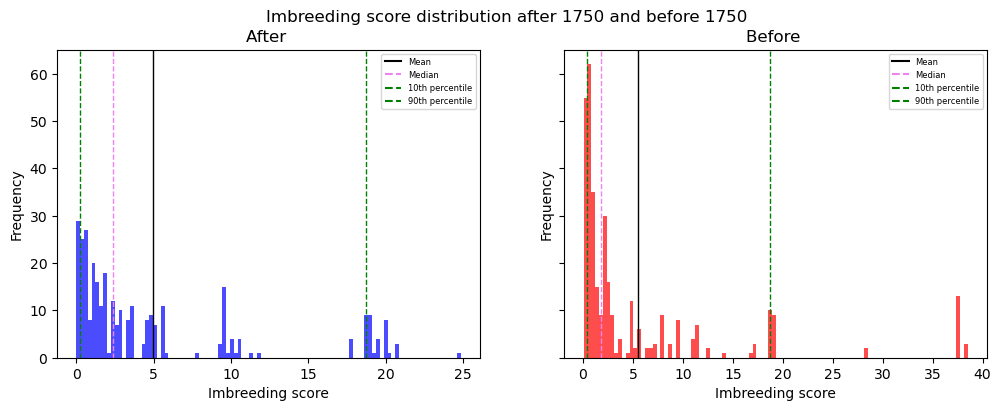

median before: 1.7578125
median after: 2.3715998977422714


In [4]:
# Subplot comparing imbreed_scores_after_1750 against imbreed_scores_before_1750 distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Figure title
fig.suptitle('Imbreeding score distribution after 1750 and before 1750')

# Create histograms for each set of scores
hist_after_1750 = ax1.hist(imbreed_scores_after, bins=100, color='blue', alpha=0.7, label='After 1750')
hist_before_1750 = ax2.hist(imbreed_scores_before, bins=100, color='red', alpha=0.7, label='Before 1750')

# Set x-axis limits for better comparison
#x_min, x_max = min(imbreed_scores_after), max(imbreed_scores_after)
#ax1.set_xlim(x_min, x_max)
#ax2.set_xlim(x_min, x_max)

# Set x-axis ticks at intervals of 10
#xticks_interval = 10
#ax1.set_xticks(np.arange(x_min, x_max + 1, xticks_interval))
#ax2.set_xticks(np.arange(x_min, x_max + 1, xticks_interval))

# Calculate statistics for each set of scores
mean_after = np.mean(imbreed_scores_after)
mean_before= np.mean(imbreed_scores_before)
median_after = np.median(imbreed_scores_after)
median_before = np.median(imbreed_scores_before)
percentile_10_after= np.percentile(imbreed_scores_after, 10)
percentile_10_before = np.percentile(imbreed_scores_before, 10)
percentile_90_after = np.percentile(imbreed_scores_after, 90)
percentile_90_before = np.percentile(imbreed_scores_before, 90)

# Add vertical lines for the statistics
ax1.axvline(mean_after, color='black', linestyle='solid', linewidth=1)
ax1.axvline(median_after, color='violet', linestyle='dashed', linewidth=1)
ax1.axvline(percentile_10_after, color='green', linestyle='dashed', linewidth=1)
ax1.axvline(percentile_90_after, color='green', linestyle='dashed', linewidth=1)

ax2.axvline(mean_before , color='black', linestyle='solid', linewidth=1, label='Dashed lines')
ax2.axvline(median_before, color='violet', linestyle='dashed', linewidth=1)
ax2.axvline(percentile_10_before, color='green', linestyle='dashed', linewidth=1)
ax2.axvline(percentile_90_before, color='green', linestyle='dashed', linewidth=1)

# Add legends, labels, and titles to the plot
ax1.set_xlabel('Imbreeding score')
ax1.set_ylabel('Frequency')
ax1.set_title('After ')
ax1.legend()

ax2.set_xlabel('Imbreeding score')
ax2.set_ylabel('Frequency')
ax2.set_title('Before ')
ax2.legend()

# Add legends, labels, and title to the plot
colors = {"Mean": 'black', "Median": 'violet', "10th percentile": 'green', "90th percentile": 'green'}
labels = list(colors.keys())
handles = [plt.Line2D([0], [0], color=colors[label], linestyle='-' if label == "Mean" else '--') for label in labels]
ax1.legend(handles, labels, fontsize=6,)
ax2.legend(handles, labels, fontsize=6,)

plt.show()

print("median before:", median_before)
print("median after:", median_after)


* in modern age we have fuw nodes with imbr score >100 that strabge both for construction then for the meaning!!!

* It is strange or at least not what I expected  as I thought in the past the imbreeding was more common and the imbreeding score should be higher.
    However, it has to be taken in consideration that our inbreeding score for the more recent person will consider (for a small amount) the inbreeding score of the past people. So people with time get more and more imbreeded in some sort (is this a helth issue in long run? Check [imbreeding scientific article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5916862/))
    **still strange!!! we have to find a possible explantion!!**
* **we could compare the after 1800 imbreeded score distibution with the 1800 distibution given from the network starting at 1800!!!**

* value above the 100 have to be checked!!